# Macro III - Problem Set 02

Vinícius de Almeida Nery Ferreira

September 2nd, 2024

We will study and **RBC Model with Capital Adjustment Costs**.

Consider an economy in which there is a continuum of infinitely lived households of measure 1 that choose how much to consume $c_t \in \mathbb{R}_+$, and invest $i_t \in \mathbb{R}_+$, in each period $t \in \mathbb{N}_0$. 

They earn income from profits of the firm $\omega_t \in \mathbb{R}_+$, and from renting the capital stock, taking prices $r_t \in \mathbb{R}_+$ as given. 

$$
\max_{(c_t, i_t)_t} \sum_{t=0}^\infty \beta^t u(c_t)
$$

subject to

$$
c_t + i_t \leq r_t k_t + \omega_t
$$

$$
k_{t+1} = i_t + (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t,
$$

where

$$
u(c_t) = \frac{c_t^{1-\sigma}}{1-\sigma}.
$$

For the supply side, there is a representative competitive firm that produces according to the technology

$$
Y_t = A_t K_t^\alpha,
$$

renting capital at the given rate $r_t$.

In [1]:
# Importing packages
## Data
import numpy as np
import pandas as pd

## Plots
import matplotlib.pyplot as plt
plt.style.use('bmh')

## Other
import math
import random
import time
from tqdm import tqdm

## Methods
from scipy.optimize import fsolve, root
import scipy.stats as stats
from quantecon.markov.approximation import rouwenhorst

# Setting seeds for random
random.seed(121019)
np.random.seed(121019)

In [2]:
# Initial time
t0_script = time.time()

## Question 1.1. - Deterministic Equilibrium 

Assume $A_t = A \quad \forall t \in \mathbb{N}_0$.

This means we don't have productivity shocks across periods.

### (a) Equilibrium

#### Competitive Equilibrium

As usual, a competitive equilibrium is where all agents are maximizing their value functions subject to the appropriate constraints and all markets clear.
In this case, we have two markets: goods and capital.

##### Consumer

We can rewrite the consumer problem by substituting $i_t$ in the adjustment cost restriction into the budget constraint to get

$$
\max_{(c_t, k_{t+1})_t} \sum_{t=0}^\infty \beta^t \frac{c_t^{1-\sigma}}{1-\sigma}
$$

subject to

$$
c_t = r_t k_t + \omega_t
- \left\{k_{t+1} - (1 - \delta)k_t + \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t \right\}
$$

where we use equality in the restriction due to the utility function satisfying the usual INADA conditions.

The restriction holds for all $t$, so we can write it as

$$
c_{t+1} = r_{t+1} k_{t+1} + \omega_{t+1}
- \left\{k_{t+2} - (1 - \delta)k_{t+1} + \frac{\phi}{2} \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right)^2 k_{t+1} \right\}
$$

This is useful, since now we can construct Euler Equations.

The basic idea is that the marginal utility of consumption has to be equal to its marginal cost, which is the decrease in consumption tomorrow (due to less capital tomorrow) times the marginal utility of such future consumption.

However, we also have to account for the fact that higher capital tomorrow leads to bigger adjustment costs, and so decrease consumption in the present.

We then have that the Euler equations for every $t \in \mathbb{N}_0$ are

$$
\frac{\partial c_{t}}{\partial k_{t+1}}u'(c_t) - \frac{\partial c_{t+1}}{\partial k_{t+1}} \beta u'(c_{t+1}) = 0
$$

$$
\left[1 + \frac{\phi}{2} 2 \left( \frac{k_{t+1}}{k_{t}} - 1 \right) \frac{1}{k_{t}} k_{t} \right] u'(c_t) = \beta \left[r_{t+1} + (1-\delta) - \frac{\phi}{2} \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right)^2 - k_{t+1} \phi \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right) (-1) \frac{k_{t+2}}{(k_{t+1})^2} \right] u'(c_{t+1})
$$

Since $u'(c_t) = c_{t}^{-\sigma}$, we can write the Euler Equation as

$$
\left[1 + \phi \left( \frac{k_{t+1}}{k_{t}} - 1 \right) \right] 
c_{t}^{-\sigma} 
= \beta \left[r_{t+1} + (1 - \delta) - \frac{\phi}{2} \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right)^2 + \frac{k_{t+2}}{k_{t+1}} \phi \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right) \right] 
c_{t+1}^{-\sigma}
$$

Since 

$$
c_t = r_t k_t + \omega_t - \left\{k_{t+1} - (1 - \delta)k_t + \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t \right\}
$$

and 

$$
-\frac{\phi}{2} \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right)^2 + \frac{k_{t+2}}{k_{t+1}} \phi \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right)
= - \frac{\phi}{2}\left[\left(\frac{k_{t+2}}{k_{t+1}}\right)^2 - 2\frac{k_{t+2}}{k_{t+1}} + 1 \right] + \phi \left[\left( \frac{k_{t+2}}{k_{t+1}} \right)^2 - \frac{k_{t+2}}{k_{t+1}} \right]
= \frac{\phi}{2}\left( \frac{k_{t+2}}{k_{t+1}} \right)^2 - \frac{\phi}{2}
$$

we can write the Euler Equation as

$$
\left[1 + \phi \left( \frac{k_{t+1}}{k_{t}} - 1 \right) \right] 
\left\{r_t k_t + \omega_t - k_{t+1} + (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t  \right\}^{-\sigma} 
= \\
\quad 
\beta \left\{r_{t+1} + (1 -\delta) + \frac{\phi}{2} \left[ \left( \frac{k_{t+2}}{k_{t+1}} \right)^2 - 1 \right] \right\} 
\left\{r_{t+1} k_{t+1} + \omega_{t+1} - k_{t+2} + (1 - \delta)k_{t+1} - \frac{\phi}{2} \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right)^2 k_{t+1} \right\}^{-\sigma}
\tag{Euler}
$$

In addition to the Euler Equation (which is a second-order difference equation), we also have the two constraints:

$$
c_t + i_t = r_t k_t + \omega_t
\tag{Budget}
$$

$$
k_{t+1} = i_t + (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t
\tag{Adjustment}
$$

##### Firm

The firm's problem is simpler.

She chooses the amount of capital to rent in order to maximize profits $\omega_t$ at every instant $t$, so the problem is

$$
\max_{K_t} \left\{AK_t^\alpha - r_t K_t \right\}
$$

which gives the usual FOC

$$
\alpha A K_t^{\alpha - 1} = r_t
\tag{Firm}
$$

##### Market Clearing

As said before, we only have two markets: goods and capital.
For markets to clear, it must be that

$$
K_t = k_t
\tag{Capital}
$$

and

$$
Y_t = AK_t^\alpha = c_t + i_t = r_t k_t + \omega_t
\tag{Goods}
$$

for all $t \in \mathbb{N}_0$.

##### Endogenous Variables

We have six endogenous variables: $\left(c_t, i_t, k_t, K_t, r_t, Y_t \right)$.

If we count equations, we have exactly six, so the model is just identified.

#### Social Planner

We assume a utilitarian planner, so that it maximizes the households' utility .

He/she already knows the market clearing conditions, so they can be incorporated into the problem.
In particular,

$$
Y_t = c_t + i_t \quad \therefore \quad c_t = Y_t - i_t
$$

Using that $Y_t = A K_t^\alpha$, $K_t = k_t$ and that $-i_t = (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t - k_{t+1}$, the social planner problem is thus

$$
\max_{k_t} \sum_{t=0}^\infty \beta^t u\left(A k_t^\alpha + (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t - k_{t+1}\right)
$$

with $u(c_t) = \frac{c_t^{1-\sigma}}{1-\sigma}$.

The FOC of this problem is again another Euler Equation, that states the marginal utility today has to be equal to its marginal cost tomorrow.

Using that $u'(c_t) = c_t^{-\sigma}$,

$$
\left[1 + \phi \left( \frac{k_{t+1}}{k_{t}} - 1 \right) \right]
\left\{A k_t^\alpha + (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t - k_{t+1} \right\}^{-\sigma}
= \\
\beta
\left\{
    A \alpha k_{t+1}^{\alpha - 1} + (1-\delta) + \frac{\phi}{2} \left[ \left( \frac{k_{t+2}}{k_{t+1}} \right)^2 - 1 \right]
\right\}
\left\{A k_{t+1}^\alpha + (1 - \delta)k_{t+1} - \frac{\phi}{2} \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right)^2 k_{t+1} - k_{t+2} \right\}^{-\sigma}
\tag{Social}
$$

If we notice closely, this is the same equation as *(Euler)* when replacing the market clearing conditions and the FOC of the firm.

Thus, **the solutions to the problems are the same**, as we don't have no source of externalities or market distortions.

This fact will be quite useful when computing trajectories, as we can just use the above Euler equation.

### (b) Steady-State Variables

In the steady-state, $k_{t} = k_{t+1} = k_{t+2} = k$. 
We can also omit the subscript for the other variables.

Using this in the *(Euler)* equation, we get

$$
\left[1 + \phi \left( \frac{k}{k} - 1 \right) \right] 
\left\{r k + \omega - k + (1 - \delta)k - \frac{\phi}{2} \left( \frac{k}{k} - 1 \right)^2 k  \right\}^{-\sigma} 
= \\
\quad 
\beta \left\{r + (1 - \delta) + \frac{\phi}{2} \left[ \left( \frac{k}{k} \right)^2 - 1 \right] \right\} 
\left\{r k + \omega - k + (1 - \delta)k - \frac{\phi}{2} \left( \frac{k}{k} - 1 \right)^2 k \right\}^{-\sigma}
$$

In the steady-state and with market clearing, $\omega = A k^\alpha - r k$.

We then have that

$$
\left\{ A k^\alpha - k + (1 - \delta)k  \right\}^{-\sigma} 
= \beta \left\{r + (1+\delta) \right\} 
\left\{A k^\alpha - k + (1 - \delta)k \right\}^{-\sigma}
$$

From the FOC of the firm, $r = \alpha A k^{\alpha - 1}$. 
Dividing by $\left\{ A k^\alpha - k + (1 - \delta)k  \right\}^{-\sigma}$, we get

$$
1 = \beta[\alpha A k^{\alpha - 1} + (1 - \delta)]
\quad \therefore \quad
\beta \alpha A k^{\alpha - 1} = 1 - \beta (1 - \delta)
$$

And so the steady-state capital is

$$
K = k = \left( \frac{\beta \alpha A}{1 - \beta (1 - \delta)} \right)^{\frac{1}{1 - \alpha}}
\tag{Steady-State Capital}
$$

Note that this is the same as the traditional RBC model, as we have no capital changes in the steady-state and so adjustment costs don't play a role.

We note that we could have also reached the steady-state capital value by using the fact that, in the steady-state, $\frac{c_{t+1}}{c_t} = 1$.
We can then substitute the restrictions and substitute $k_t = k_{t+1} = k$ to find the steady-state value.

From the FOC of the firm ($r = \alpha A k^{\alpha - 1}$), we can get the steady-state interest rate

$$
r = \alpha A \left( \frac{\beta \alpha A}{1 - \beta (1 - \delta)} \right)^{-1}
= \frac{1 - \beta (1 - \delta)}{\beta}
\tag{Steady-State Interest}
$$

We can also get the output in steady-state by the production function

$$
Y = A K^\alpha = A\left( \frac{\beta \alpha A}{1 - \beta (1 - \delta)} \right)^{\frac{\alpha}{1 - \alpha}}
\tag{Steady-State Output}
$$

Finally, we know that, in steady-state $c = Y - i$ and

$$
-i = (1-\delta) k - \frac{\phi}{2} \left( \frac{k}{k} - 1 \right)^2 k - k
$$

$$
i = \delta k
= \delta \left( \frac{\beta \alpha A}{1 - \beta (1 - \delta)} \right)^{\frac{1}{1 - \alpha}}
\tag{Steady-State Investment}
$$

And so,

$$
c = A\left( \frac{\beta \alpha A}{1 - \beta (1 - \delta)} \right)^{\frac{\alpha}{1 - \alpha}}
- \delta \left( \frac{\beta \alpha A}{1 - \beta (1 - \delta)} \right)^{\frac{1}{1 - \alpha}}
\tag{Steady-State Consumption}
$$

We can also calculate profits, $w = Y - rk$,

$$
w = A\left( \frac{\beta \alpha A}{1 - \beta (1 - \delta)} \right)^{\frac{\alpha}{1 - \alpha}} 
- \frac{1 - \beta (1 - \delta)}{\beta} \left( \frac{\beta \alpha A}{1 - \beta (1 - \delta)} \right)^{\frac{1}{1 - \alpha}}
\tag{Steady-State Profits}
$$

### (c) Shooting (Bisection) Algorithm

The shooting algorithm basic idea is a iteration of the bisection method at every point in the second in order to arrive at the steady-state capital.

As there is no dynamic inefficiency, we can define the initial search interval to be $[0, k_{GR}]$, where $k_{GR}$ is the golden rule capital:

$$
c = Y - i = Ak^\alpha - \delta k
\quad \therefore \quad
k_{GR} = \left(\frac{\alpha A}{\delta}\right)^{\frac{1}{1 - \alpha}}
$$

From Lecture 3 slides, the algorithm is as follows:

Let $k_0 < k$. Define $[a = k_0, b = k_{GR}]$ and define a large time period $T$.
At period $T$, we want to be at the steady-state.

1. Guess $k^1_1 = \frac{a + b}{2}$, then find $k^1_2 = G(k^1_1, k^1_0)$, $k^1_3 = G(k^1_2, k^1_1)$ *(through the Euler Equations)*, and so on!

   - If $k^1_T > k$, then (over-accumulation), $k^1_1$ too high, define $b = k^1_1$.
   - If $k^1_T < k$, then (under-accumulation), $k^1_1$ too low, define $a = k^1_1$.
   - If $|k^1_T - k| < \varepsilon$, then stop!

2. Guess $k^2_1 = \frac{a + b}{2}$, then find $k^2_2 = G(k^2_1, k^2_0)$, and $k^2_3 = G(k^2_2, k^2_1)$, and so on!

   - If $k^2_T > k$, then (over-accumulation), $k^2_1$ too high, define $b = k^2_1$.
   - If $k^2_T < k$, then (under-accumulation), $k^2_1$ too low, define $a = k^2_1$.
   - If $|k^2_T - k| < \varepsilon$, then stop!

3. And so on!

The difficulty in implementing is that $k_2^n$ is not easily findable, as we can't quite isolate it in the Euler Equation.

We must therefore use an idea that is in Lecture 2 (slide 49): construct a vector $[k_0, k_1, ..., k_T]$ that solves

$$
\psi(k_2, k_1, k_0) = 0 \\
\psi(k_3, k_2, k_1) = 0 \\
\vdots \\
\psi(k_{T+1}, k_{T}, k_{T-1}) = 0,
$$

where $\psi$ is the Euler Equation, $k_{T+1} = k$ and $k_0$ is given.

Note that, if we pass $k_1$ and $k_0$, finding $k_2$ boils down to a root finding problem, which we saw how to solve in Problem Set 01.

#### Algorithm for Capital

In [3]:
# Defining parameters
beta = .98
sigma = 2
A = 1
alpha = 1 / 3
delta = .05
phi = 5
T = 200  # 100 was too few

# Dictionaries for parameter
# In PS01, I had a lot of issues with functions overwriting the 
# parameter in the 'outer' environment, and so chose to go for a dictionary
# with all parameters. It turned out the code was much cleaner and with less problems!
param_dict = {
    'beta': beta,
    'sigma': sigma,
    'A': A,
    'alpha': alpha,
    'delta': delta,
    'phi': phi,
    'T': T
}

param_dict_no_adj_costs = {
    'beta': beta,
    'sigma': sigma,
    'A': A,
    'alpha': alpha,
    'delta': delta,
    'phi': 0,
    'T': T
}

In [4]:
# Calculating steady state capital
def k_steady_state(param_dict):
    # Getting relevant parameters
    alpha = param_dict['alpha']
    A = param_dict['A']
    delta = param_dict['delta']
    
    return ((beta * alpha * A) / (1 - beta * (1 - delta))) ** (1 / (1 - alpha))

# Calculating
k_ss = k_steady_state(param_dict)
print(f"Steady-state Capital: {round(k_ss, 4)}.")

Steady-state Capital: 10.3011.


In [5]:
# The initial capital is half of steady-state
k0 = k_ss / 2

# Golden rule capital
def k_golden_rule(param_dict):
    # Getting relevant parameters
    alpha = param_dict['alpha']
    beta = param_dict['beta']
    A = param_dict['A']
    delta = param_dict['delta']
    
    return ((alpha * A) / delta) ** (1 / (1 - alpha))

# Calculating
k_gr = k_golden_rule(param_dict)
print(f"Golden-rule Capital: {round(k_gr, 4)}.")

Golden-rule Capital: 17.2133.


We will now define the Euler Equation, which is referred to as $G$ in the slides.
Recall that it is given by

$$
\left[1 + \phi \left( \frac{k_{t+1}}{k_{t}} - 1 \right) \right]
\left\{A k_t^\alpha + (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t - k_{t+1} \right\}^{-\sigma}
= \\
\beta
\left\{
    A \alpha k_{t+1}^{\alpha - 1} + (1-\delta) + \frac{\phi}{2} \left[ \left( \frac{k_{t+2}}{k_{t+1}} \right)^2 - 1 \right]
\right\}
\left\{A k_{t+1}^\alpha + (1 - \delta)k_{t+1} - \frac{\phi}{2} \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right)^2 k_{t+1} - k_{t+2} \right\}^{-\sigma}
$$

This can be rewritten as

$$
\left[1 + \phi \left( \frac{k_{t+1}}{k_{t}} - 1 \right) \right]
\left\{A k_{t+1}^\alpha + (1 - \delta)k_{t+1} - \frac{\phi}{2} \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right)^2 k_{t+1} - k_{t+2} \right\}^{\sigma}
= \\
\beta
\left\{
    A \alpha k_{t+1}^{\alpha - 1} + (1-\delta) + \frac{\phi}{2} \left[ \left( \frac{k_{t+2}}{k_{t+1}} \right)^2 - 1 \right]
\right\}
\left\{A k_t^\alpha + (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t - k_{t+1} \right\}^{\sigma}
$$

or further

$$
\left[1 + \phi \left( \frac{k_{t+1}}{k_{t}} - 1 \right) \right]^{\frac{1}{\sigma}}
\left\{A k_{t+1}^\alpha + (1 - \delta)k_{t+1} - \frac{\phi}{2} \left( \frac{k_{t+2}}{k_{t+1}} - 1 \right)^2 k_{t+1} - k_{t+2} \right\}
- \\
\beta^{\frac{1}{\sigma}}
\left\{
    A \alpha k_{t+1}^{\alpha - 1} + (1-\delta) + \frac{\phi}{2} \left[ \left( \frac{k_{t+2}}{k_{t+1}} \right)^2 - 1 \right]
\right\}^{\frac{1}{\sigma}}
\left\{A k_t^\alpha + (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t - k_{t+1} \right\}
=
0
$$

Assuming an increasing capital path, the implicit function defined above is increasing as well, which is important when defining our functions.

In [6]:
# Defining the Euler equation (psi) as above
def euler_equation(k0, k1, k2, param_dict):
    # Getting parameters
    alpha = param_dict['alpha']
    beta = param_dict['beta']
    A = param_dict['A']
    delta = param_dict['delta']
    sigma = param_dict['sigma']
    phi = param_dict['phi']

    # Consumption today
    term1 = A * (k0 ** alpha) + (1 - delta) * k0 - k0 * (phi / 2) * ((k1 / k0) - 1) ** 2 - k1

    # Consumption in the next period
    term2 = A * (k1 ** alpha) + (1 - delta) * k1 - k1 * (phi / 2) * ((k2 / k1) - 1) ** 2 - k2

    # Derivative of present consumption with respect to capital in the next period
    term3 = 1 + phi * (k1 / k0 - 1)

    # Derivative of future consumption with respect to capital in the next period
    term4 = A * alpha * (k1 ** (alpha - 1)) + (1 - delta) + (phi / 2) * ((k2 / k1) ** 2 - 1)

    # Constructing function
    lhs = term3 ** (1 / sigma) * term2
    rhs = (beta * term4) ** (1 / sigma) * term1
    
    return lhs - rhs

We must now implement the algorithm to find the root of the Euler Equation given $k_1$ and $k_0$.

We will do this using the function fsolve, which uses Powell's Hybrid Method (see Lecture 3).

In [7]:
def find_k2(k0, k1, param_dict):
    # lambda k2 ensures fsolve only interprets k2 as the decision variable,
    # with all other variables being interpreted as fixed parameters
    ## Initial guess for k2 will be k1
    k2_solutions = fsolve(func=lambda k2: euler_equation(k0, k1, k2, param_dict), 
                          x0=k1)

    # May get capital values which are negative, which we don't want
    k2_solutions = [sol for sol in k2_solutions if sol > 0]

    # Returning: if there is no solution, return None, otherwise return the minimum positive value for k2
    # We take the minimum due to the final way we wrote the Euler Equation; it doesn't work when
    # written in other, seemly equivalent ways (trust me I have tried)
    if not k2_solutions:
        return None
    else:
        return min(k2_solutions)

We have done the first step in the algorithm.

We now need to check if the proposed solution yields the steady-state capital at the end of $T$ periods.
That is, we implement the step:

*Guess $k^1_1 = \frac{a + b}{2}$, then find $k^1_2 = G(k^1_1, k^1_0)$, $k^1_3 = G(k^1_2, k^1_1)$ *(through the Euler Equations)*, and so on!*

The only caveat is that we can't find $k_2$ explictly, and have to do so by finding the root of the implicit function defined by the Euler Equation.

In [8]:
# Given the Euler Equation, k0, k1 and the parameters, we can find the whole path!
def capital_path(k0, k1, param_dict):
    # Getting relevant parameters
    T = param_dict['T']

    # First getting k(2)
    k2 = find_k2(k0, k1, param_dict)

    # Creating list with capital values
    k_path = [k0, k1, k2]

    # Iterating across the other periods to find the capitals
    for t in range(T - 2):
        # Calculating next period's capital as a function of the previous two
        k_next = find_k2(k0 = k_path[-2], k1 = k_path[-1], param_dict=param_dict)

        # Add it to the list if it the root was found; otherwise, break
        if k_next is not None:
            k_path.append(k_next)
        else:
            k_path.append(np.nan)
            break
    
    # Return list of consumption path
    return k_path

We now implement the steps

   - If $k^1_T > k$, then (over-accumulation), $k^1_1$ too high, define $b = k^1_1$.
   - If $k^1_T < k$, then (under-accumulation), $k^1_1$ too low, define $a = k^1_1$.
   - If $|k^1_T - k| < \varepsilon$, then stop!

In [9]:
"""
The initial values for a and b are k0 and k_gr.

Note that, in more general terms
k0 = initial value for the sequence (given)
k_ss = final (desired) value for the sequence

We just need k_gr (b) so as to calculate the initial guess for k1
"""

def check_steady_state(a, b, k0, k_ss, param_dict):
    # Guess for k1, as in the slides
    k1 = (a + b) / 2
    
    # Getting capital path and final value
    k_path = capital_path(k0, k1, param_dict)
    k_T = k_path[-1]

    # Checking if final value is larger or smaller than steady-state value
    if k_T >= k_ss:
        b = k1
    else:
        a = k1

    # Returning interval and the path
    return a, b, k_path

We now implement the whole thing.

In [10]:
def optimal_capital_path(k0, k_ss, k_gr, param_dict, tol=1e-4, max_iter=100):
    # First iteration
    a, b, k_path = check_steady_state(a=k0, b=k_gr, k0=k0, k_ss=k_ss, param_dict=param_dict)

    # Checking to see if it already converges
    if abs(k_path[-1] - k_ss) < tol:
        return k_path, 0
    
    # If not, we iterate until we get convergence or reach the maximum allowed
    for n in range(max_iter):
        # Calculating new capital path and bounds for the initial guess
        a, b, k_path = check_steady_state(a=a, b=b, k0=k0, k_ss=k_ss, param_dict=param_dict)

        # Checking convergence
        if abs(k_path[-1] - k_ss) < tol:
            return k_path, n

    if n >= max_iter:
        raise RuntimeError("Maximum number of iterations reached without convergence.")


#### Optimal Capital Path

In [11]:
# Calculating optimal path (with a few warnings from fsolve but we live with them)
# phi = 5
t0 = time.time()
optimal_k_path, num_iter = optimal_capital_path(k0, k_ss, k_gr, param_dict)
time_shooting = time.time() - t0

# phi = 0
optimal_k_path_no_adj_costs, num_iter_no_adj_costs = optimal_capital_path(
    k0, k_ss, k_gr, 
    param_dict_no_adj_costs
)

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_54373/876677208.py:25: RuntimeWarning: invalid value encountered in sqrt
  rhs = (beta * term4) ** (1 / sigma) * term1
/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_54373/3639487090.py:5: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  k2_solutions = fsolve(func=lambda k2: euler_equation(k0, k1, k2, param_dict),
/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_54373/876677208.py:24: RuntimeWarning: invalid value encountered in scalar power
  lhs = term3 ** (1 / sigma) * term2
/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_54373/3639487090.py:5: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  k2_solutions = fsolve(func=lambda k2: euler_equation(k0, k1, k2, param_dict),


#### Path of Other Variables

We have six endogenous variables: $\left(c_t, i_t, k_t, K_t, r_t, Y_t \right)$.
We need to find the path of the other four (excluding capital)

In [12]:
# Output
def output_path(optimal_k_path, param_dict):
    # Getting parameters
    alpha = param_dict['alpha']
    A = param_dict['A']

    return [A * k ** alpha for k in optimal_k_path]

In [13]:
# Real interest rate
def r_path(optimal_k_path, param_dict):
    # Getting parameters
    alpha = param_dict['alpha']
    A = param_dict['A']

    return [alpha * A * k ** (alpha - 1) for k in optimal_k_path]

In [14]:
# Investment
def investment_path(optimal_k_path, param_dict):
    # Getting parameters
    delta = param_dict['delta']
    phi = param_dict['phi']

    # Creating list
    investment_values = []

    for i in range(len(optimal_k_path)):
        # Capital values
        kt = optimal_k_path[i]
        kt1 = optimal_k_path[i + 1] if i < len(optimal_k_path) - 1 else kt

        # Investment constraint
        investment = kt1 - (1 - delta) * kt + (phi / 2) * kt * (kt1 / kt - 1)**2

        # Appending to list
        investment_values.append(investment)

    return investment_values

In [15]:
# Consumption
def consumption_path(output_path, investment_path):
    # Arrays
    output_path = np.array(output_path)
    investment_path = np.array(investment_path)

    return output_path - investment_path

In [16]:
# Calculating paths
optimal_y_path = output_path(optimal_k_path, param_dict)
optimal_y_path_no_adj_costs = output_path(optimal_k_path_no_adj_costs, param_dict_no_adj_costs)

optimal_r_path = r_path(optimal_k_path, param_dict)
optimal_r_path_no_adj_costs = r_path(optimal_k_path_no_adj_costs, param_dict_no_adj_costs)

optimal_i_path = investment_path(optimal_k_path, param_dict)
optimal_i_path_no_adj_costs = investment_path(optimal_k_path_no_adj_costs, param_dict_no_adj_costs)

optimal_c_path = consumption_path(optimal_y_path, optimal_i_path)
optimal_c_path_no_adj_costs = consumption_path(optimal_y_path_no_adj_costs, optimal_i_path_no_adj_costs)

In [17]:
# Calculating steady-state values
ss_k_path = [k_ss for t in range(T)]

y_ss = output_path(ss_k_path, param_dict)[0]

r_ss = r_path(ss_k_path, param_dict)[0]

i_ss = investment_path(ss_k_path, param_dict)[0]

c_ss = consumption_path(y_ss, i_ss)

#### Graphs

In [18]:
def plot_paths(optimal_k_path, optimal_k_path_no_adj_costs, k_ss,
                optimal_y_path, optimal_y_path_no_adj_costs, y_ss,
                optimal_r_path, optimal_r_path_no_adj_costs, r_ss,
                optimal_i_path, optimal_i_path_no_adj_costs, i_ss,
                optimal_c_path, optimal_c_path_no_adj_costs, c_ss,
                label1=r'$\phi = 5$', label2=r'$\phi = 0$'):
    
    # Object and title
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('Path of Endogenous Variables in the RBC Model', 
                fontsize=16, fontweight='bold')

    # Capital
    ax_k = plt.subplot2grid((3, 2), (0, 0), colspan=1)
    ax_k.plot(optimal_k_path, label=label1)
    ax_k.plot(optimal_k_path_no_adj_costs, label=label2)
    ax_k.axhline(y=k_ss, color='black', linestyle='--', linewidth=1)

    ax_k.set_xlabel('Time', fontsize=10)
    ax_k.set_ylabel(r'Capital ($k_t$)', fontsize=10)
    ax_k.legend()
    ax_k.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Consumption
    ax_c = plt.subplot2grid((3, 2), (0, 1))
    ax_c.plot(optimal_c_path, label=label1)
    ax_c.plot(optimal_c_path_no_adj_costs, label=label2)
    ax_c.axhline(y=c_ss, color='black', linestyle='--', linewidth=1)

    ax_c.set_xlabel('Time', fontsize=10)
    ax_c.set_ylabel(r'Consumption ($c_t$)', fontsize=10)
    ax_c.legend()
    ax_c.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Output
    ax_y = plt.subplot2grid((3, 2), (1, 0))
    ax_y.plot(optimal_y_path, label=label1)
    ax_y.plot(optimal_y_path_no_adj_costs, label=label2)
    ax_y.axhline(y=y_ss, color='black', linestyle='--', linewidth=1)

    ax_y.set_xlabel('Time', fontsize=10)
    ax_y.set_ylabel(r'Output ($Y_t$)', fontsize=10)
    ax_y.legend()
    ax_y.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Interesst Rate
    ax_r = plt.subplot2grid((3, 2), (1, 1))
    ax_r.plot(optimal_r_path, label=label1)
    ax_r.plot(optimal_r_path_no_adj_costs, label=label2)
    ax_r.axhline(y=r_ss, color='black', linestyle='--', linewidth=1)

    ax_r.set_xlabel('Time', fontsize=10)
    ax_r.set_ylabel(r'Real Interest Rate ($r_t$)', fontsize=10)
    ax_r.legend()
    ax_r.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Investment
    ax_i = plt.subplot2grid((3, 2), (2, 0))
    ax_i.plot(optimal_i_path, label=label1)
    ax_i.plot(optimal_i_path_no_adj_costs, label=label2)
    ax_i.axhline(y=i_ss, color='black', linestyle='--', linewidth=1)

    ax_i.set_xlabel('Time', fontsize=10)
    ax_i.set_ylabel(r'Gross Investment ($i_t$)', fontsize=10)
    ax_i.legend()
    ax_i.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Investment-to-output ratio
    ax_iy = plt.subplot2grid((3, 2), (2, 1), colspan=1)
    ax_iy.plot(np.array(optimal_i_path) / np.array(optimal_y_path), 
               label=label1)
    ax_iy.plot(np.array(optimal_i_path_no_adj_costs) / np.array(optimal_y_path_no_adj_costs),
               label=label2)
    ax_iy.axhline(y=i_ss / y_ss, color='black', linestyle='--', linewidth=1)

    ax_iy.set_xlabel('Time', fontsize=10)
    ax_iy.set_ylabel(r'Investment to Output Ratio ($i_t / Y_t$)', fontsize=10)
    ax_iy.legend()
    ax_iy.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

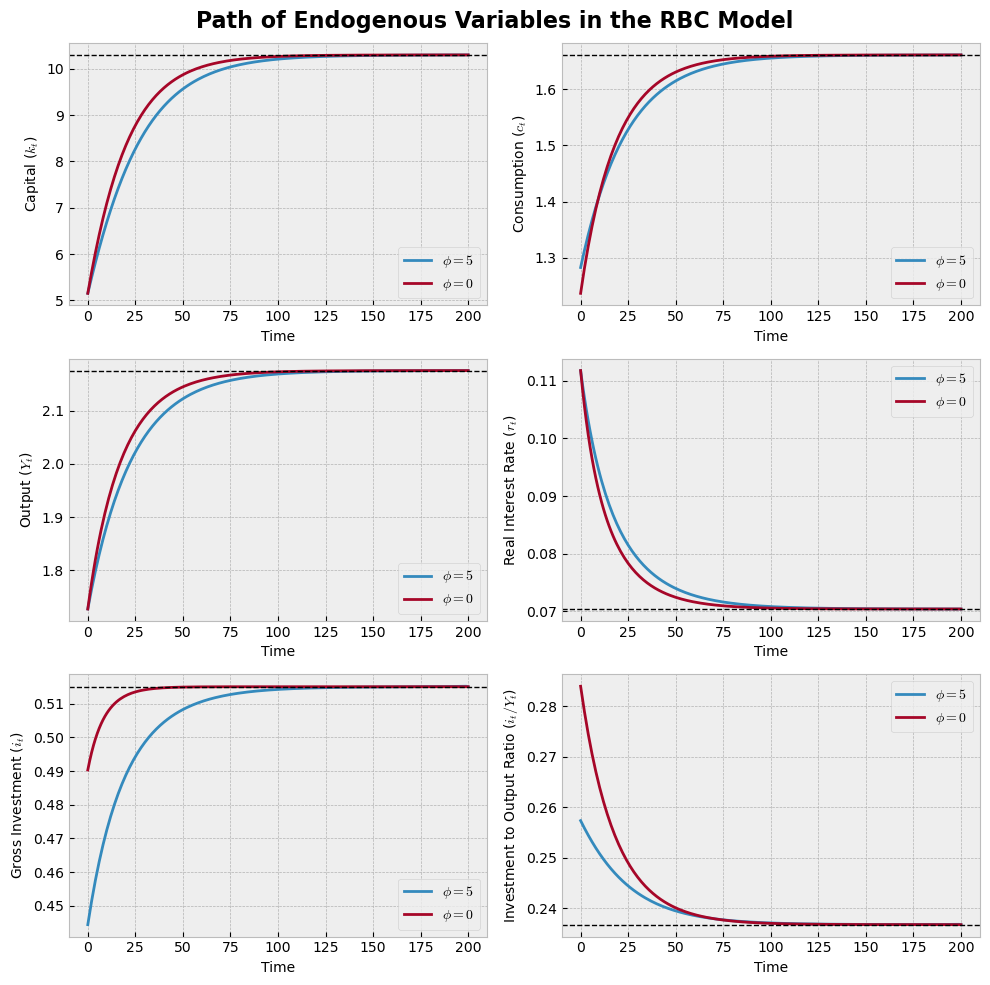

In [19]:
# Plotting paths
plot_paths(optimal_k_path, optimal_k_path_no_adj_costs, k_ss,
            optimal_y_path, optimal_y_path_no_adj_costs, y_ss,
            optimal_r_path, optimal_r_path_no_adj_costs, r_ss,
            optimal_i_path, optimal_i_path_no_adj_costs, i_ss,
            optimal_c_path, optimal_c_path_no_adj_costs, c_ss)

Lines in blue represent the path without adjustment costs ($\phi = 0$), while red curves are the ones with convex adjustment costs for investment ($\phi = 5$).

We see that, with the higher adjustment cost ($\phi = 5$), capital takes a longer time to reach the steady-state value, as gross investment is lower because of convex adjustment costs.
This is also reflected in the investment-to-output ratio, which falls more rapidly in the no-adjustment-costs case.

This leads to a similar path in output, which grows more slowly with $\phi = 5$.

As $r_t$ reflects the marginal productivity of capital, it is persistently higher in the case with adjustment costs, where capital grows more slowly.

Finally, consumption is the only variable where the curves cross before the steady-state.
Initially, consumption in the world with adjustment costs is higher, as agent invest less and thus have more disposable income to consume.

After some time, however, the output in the world without such costs is large enough - due to bigger investments and capital accumulation - such that it is able to cover this initial difference, and so consumption with $\phi = 0$ surpasses that of $\phi = 5$.

### (d) Simultaneous Equations

The $T$ simultaneous equations we have to solve are the Euler Equations $\psi_t$.
That is, we have to find a vector a vector $[k_0, k_1, ..., k_T]$ that solves

$$
\psi(k_2, k_1, k_0) = 0 \\
\psi(k_3, k_2, k_1) = 0 \\
\vdots \\
\psi(k_{T+1}, k_{T}, k_{T-1}) = 0,
$$

Since we know $k_0 = \frac{k}{2}$ and $k_{T+1} = k$ (where we want to arrive), we have a system of $T$ equations and $T$ unknown variables.

To accomplish to solve for the path using a simultaneous equation approach, we will need to modify our euler equation function, i.e., we will need to transform it to a vector form, keeping constant $k_0$ and $k$.

In [20]:
def euler_equation_vector(k_path_1T, k0, k_ss, param_dict):
    """
    Creates a vector with the euler equations, with k0 and k_ss given.

    Parameters:
    - k_path_1T: k(1) through k(T). DOES NOT INCLUDE k(0) or k(T+1), which are fixed (see below);
    - k0: initial capital stock;
    - k_ss: steady-state capital stock (desired / final capital stock);
    - param_dict: dictionary of relevant parameters for this and euler_equations().
    """
    
    # Getting number of periods
    T = param_dict['T']

    # Array to hold the equations
    euler_equations = np.zeros(T)

    # Recall that we want k0 and k_ss to be fixed; we will only solve for k_path_1T
    # This is why we pass them as separate arguments and why we will compute them separately
    # If we were to pass everything in one argument, fsolve or root would change these values also
    euler_equations[0] = euler_equation(
        k0 = k0, k1 = k_path_1T[0], k2 = k_path_1T[1], 
        param_dict=param_dict
    )

    euler_equations[T - 1] = euler_equation(
        k0 = k_path_1T[-2], k1 = k_path_1T[-1], k2 = k_ss, 
        param_dict=param_dict
    )

    # Creating equations for other periods
    for t in range(1, T - 1):
        euler_equations[t] = euler_equation(
            k0 = k_path_1T[t - 1], k1 = k_path_1T[t], k2 = k_path_1T[t + 1], 
            param_dict=param_dict
        )

    return np.array(euler_equations)

We will now solve the $T$ simultaneous equations using the *root* function from *scipy.optimize*.
This too uses Powell's Hybrid Method as the default.

In [21]:
# Solving for the path using root from scipy
## Initial guess will be a linear trajectory between k0 and k_ss
initial_guess_path_simultaneous = np.linspace(k0, k_ss, T)

## Solving
# Again, using lambda to ensure only k_path_1T is interpreted as the choice variable,
# with the other parameters fixed
t0 = time.time()

k_path_simultaneous = root(
    fun=lambda k_path_1T: euler_equation_vector(k_path_1T, k0, k_ss, param_dict), 
    x0=initial_guess_path_simultaneous
)

time_simultaneous = time.time() - t0

In [22]:
# Grabbing the right object from root
k_path_simultaneous = k_path_simultaneous.x

# Adding k0 and k_ss
k_path_simultaneous = np.insert(k_path_simultaneous, [0, T], [k0, k_ss])

In [23]:
# Doing the same thing with no adjustment costs
k_path_simultaneous_no_adj_costs = root(
    fun=lambda k_path_1T: euler_equation_vector(k_path_1T, k0, k_ss, param_dict_no_adj_costs), 
    x0=initial_guess_path_simultaneous
)

# Grabbing the right object
k_path_simultaneous_no_adj_costs = k_path_simultaneous_no_adj_costs.x

# Adding k0 and k_ss
k_path_simultaneous_no_adj_costs = np.insert(k_path_simultaneous_no_adj_costs, [0, T], [k0, k_ss])

In [24]:
# Calculating paths
y_path_simultaneous = output_path(k_path_simultaneous, param_dict)
y_path_simultaneuos_no_adj_costs = output_path(
    k_path_simultaneous_no_adj_costs, param_dict_no_adj_costs
)

r_path_simultaneous = r_path(k_path_simultaneous, param_dict)
r_path_simultaneous_no_adj_costs = r_path(
    k_path_simultaneous_no_adj_costs, param_dict_no_adj_costs
)

i_path_simultaneous = investment_path(k_path_simultaneous, param_dict)
i_path_simultaneous_no_adj_costs = investment_path(
    k_path_simultaneous_no_adj_costs, param_dict_no_adj_costs
)

c_path_simultaneous = consumption_path(y_path_simultaneous, i_path_simultaneous)
c_path_simultaneous_no_adj_costs = consumption_path(
    y_path_simultaneuos_no_adj_costs, i_path_simultaneous_no_adj_costs
)

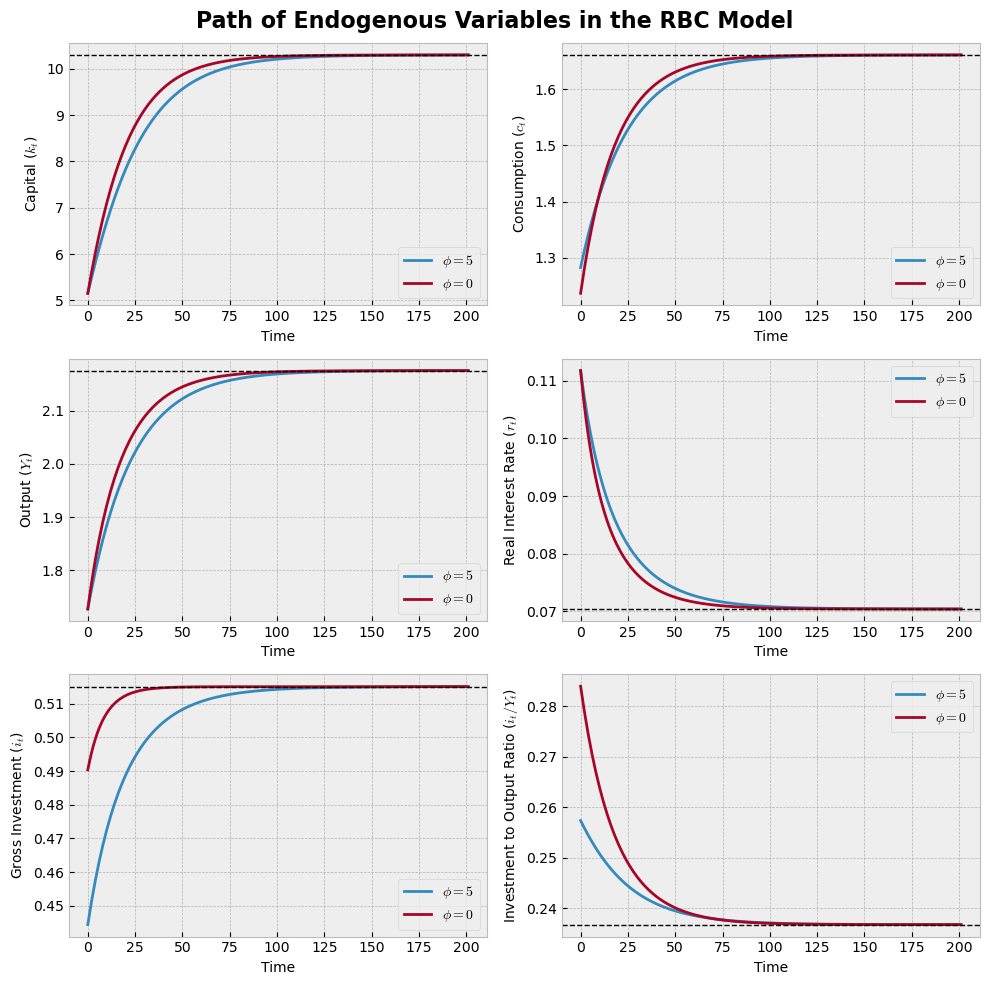

In [25]:
# Plotting paths
plot_paths(k_path_simultaneous, k_path_simultaneous_no_adj_costs, k_ss,
            y_path_simultaneous, y_path_simultaneuos_no_adj_costs, y_ss,
            r_path_simultaneous, r_path_simultaneous_no_adj_costs, r_ss,
            i_path_simultaneous, i_path_simultaneous_no_adj_costs, i_ss,
            c_path_simultaneous, c_path_simultaneous_no_adj_costs, c_ss)

We get the same interpretations as in item ***(c)***.

We will now see whether the speed of convergence to the steady-state is different across methods.
As we can see, the methods deliver almost identical results.

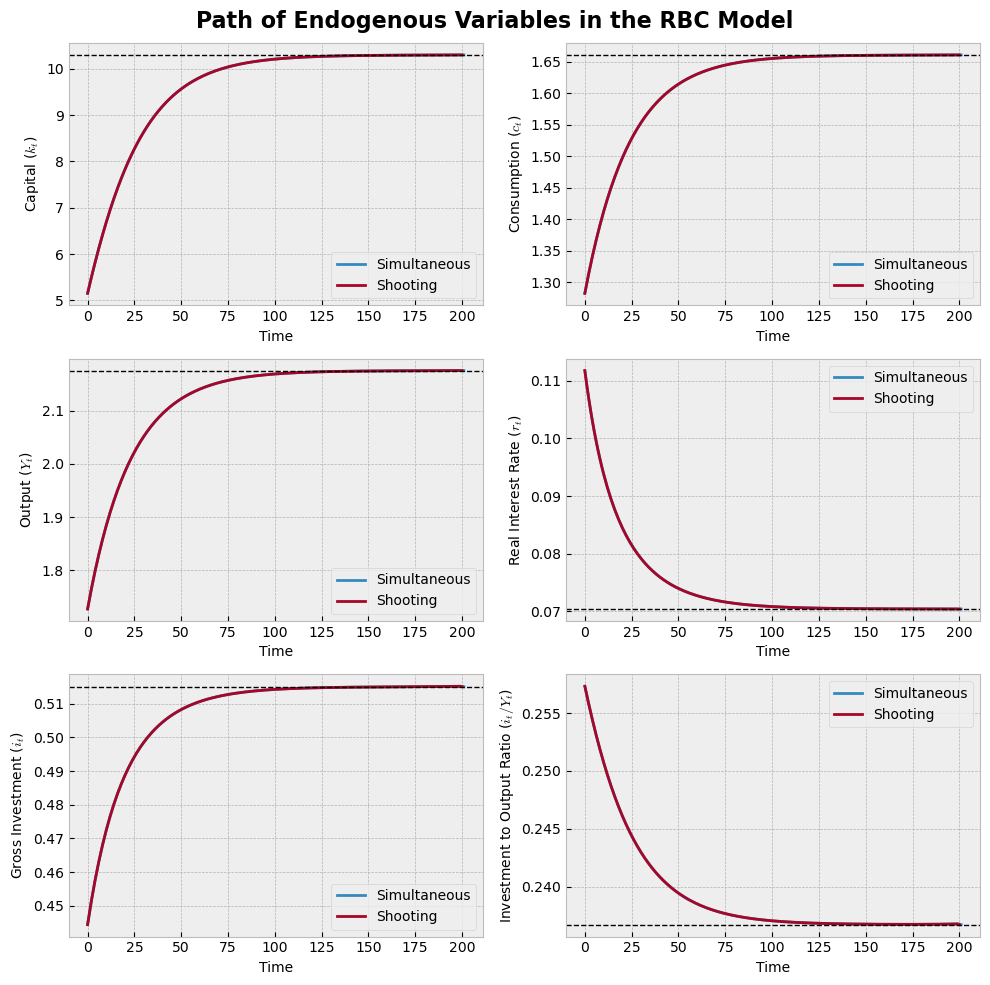

In [26]:
# Plotting paths
plot_paths(k_path_simultaneous, optimal_k_path, k_ss,
            y_path_simultaneous, optimal_y_path, y_ss,
            r_path_simultaneous, optimal_r_path, r_ss,
            i_path_simultaneous, optimal_i_path, i_ss,
            c_path_simultaneous, optimal_c_path, c_ss,
            label1="Simultaneous", label2="Shooting")

### (e) Recursive Competitive Equilibrium

#### Households

Recall that the household's problem can be written as

$$
\max_{(c_t, k_{t+1})_t} \sum_{t=0}^\infty \beta^t \frac{c_t^{1-\sigma}}{1-\sigma}
$$

subject to

$$
c_t = r_t k_t + \omega_t
- \left\{k_{t+1} - (1 - \delta)k_t + \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t \right\}
$$

If we substitute the restriction, we end up with

$$
\max_{k_{t+1} \geq 0} \sum_{t=0}^\infty \beta^t \frac{1}{1-\sigma}
\left[
    r_t k_t + \omega_t
    - k_{t+1} + (1 - \delta)k_t - k_t \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2
\right]^{1 - \sigma}
$$

Note that the horizon of the problem is infinite so, at each $t$, the household essentially faces the same problem.

Letting $'$ denote future (next-period) variables, the Bellman Equation of the problem is

$$
V(k) = \max_{k' \geq 0} 
\left\{
    \frac{1}{1-\sigma}
\left[
    r k + \omega
    - k' + (1 - \delta)k - k \frac{\phi}{2} \left( \frac{k'}{k} - 1 \right)^2
\right]^{1 - \sigma}
+ \beta V(k')
\right\}
$$

The recursive competitive equilibrium is similar to before:

- Households maximize their value function;
- Firms maximize their profits;
- Market for goods clears at every period;
- Market for capital clears at every period;

#### Firms

The firm's problem is one of maximizing at every $t$, and does not depend on any future variable.
In this notation, it is given by

$$
\max_{K} \left\{AK^\alpha - r K \right\}
$$

which gives the usual FOC

$$
\alpha A K^{\alpha - 1} = r
$$

#### Market Clearing

For markets to clear, it must be that

$$
K = k
$$

and

$$
Y = AK^\alpha = c + i = r k + \omega
$$

### (f) Value Function Iteration

#### Capital Space

Our state space $[k^1, k^2, ..., k^N], k^1 < k^2 < ... < k^N$ has to be large enough to encompass the solution, and so we choose $k^1 = \frac{k_{ss}}{2}$ (since $k_0 = \frac{k_{ss}}{2} < k_{ss}$) and $k^N = k_{GR}$.

Given the intervals we saw in previous capital paths, the ideal would be a distance between 0.0001.

In [27]:
# Calculating N
N_capital_grid = int((k_gr - k0) / 0.0001)
N_capital_grid

120627

In [28]:
# 120k points seems a bit excessive... we will try a smaller number, 
# getting the interval between points to be close to 0.005
N_capital_grid = int((k_gr - k0) / 0.005)
N_capital_grid

2412

In [29]:
# Defining the capital grid / state space
k_space = np.linspace(k0, k_gr, N_capital_grid)

#### Value Function

First, we need to create the function that has the utility in terms of $k$ and $k'$.

Recall that the Value Function of the household is

$$
V(k) = \max_{k' \geq 0} 
\left\{
    \frac{1}{1-\sigma}
\left[
    r k + \omega
    - k' + (1 - \delta)k - k \frac{\phi}{2} \left( \frac{k'}{k} - 1 \right)^2
\right]^{1 - \sigma}
+ \beta V(k')
\right\}
$$

Using the market clearing conditions, we know that $Y = rk + \omega = Ak^\alpha$, which leaves us with

$$
V(k) = \max_{k' \geq 0} 
\left\{
    \frac{1}{1-\sigma}
\left[
    A k^ \alpha
    - k' + (1 - \delta)k - k \frac{\phi}{2} \left( \frac{k'}{k} - 1 \right)^2
\right]^{1 - \sigma}
+ \beta V(k')
\right\}
\tag{BE}
$$

In [30]:
def consumption_capital(k, k_prime, param_dict):
    """ 
    Calculates consumption as a function of capital today, tomorrow and parameters
    """
    # Getting parameters
    alpha = param_dict['alpha']
    A = param_dict['A']
    delta = param_dict['delta']
    phi = param_dict['phi']

    # Calculating consumption
    consumption = A * k**alpha - k_prime + (1 - delta) * k - k * (phi / 2) * (k_prime / k - 1)**2

    # Consumption has to be positive
    consumption = np.maximum(consumption, 1e-6)

    # Returning
    return consumption

In [31]:
def utility_capital(k, k_prime, param_dict):
    # Getting parameters
    sigma = param_dict['sigma']

    # Calculating consumption
    consumption = consumption_capital(k, k_prime, param_dict)

    # Utility
    return (1 / (1 - sigma)) * consumption ** (1 - sigma)

We now do the Value Function Iteration process, as described starting in slide 27/54 of Lecture 4.

In [32]:
def value_function_iteration(k_space, param_dict, tol=1e-6, max_iter=1000):
    """
    Iterating through vectors (function approximations) until we reach a fixed point.
    Ideally, we would pass the utility_capital function an its parameters as arguments to make this more general.
    """
    # Parameters
    beta = param_dict['beta']

    # Assuring k_space is an array
    k_space = np.array(k_space)

    # Getting dimensions of matrices and vector
    num_spaces = k_space.shape[0]

    # Initial guess
    ## V approximates the value function: for every k, it should give the maximum value attained
    V = np.zeros(num_spaces)

    # Creating meshgrid, which give coordinates of k and k'
    k_matrix, k_prime_matrix = np.meshgrid(k_space, k_space)

    # Matrix with utilities for each possible combination of k and k'
    ## Recall we want k today in the columns and k' tomorrow in the rows, so we transpose at the end
    """
    Equivalent to running something like
    for i in range(0, number_states):
        for j in range(0, number_states):
            u_matrix[i, j] = utility_capital(k=k_space[j], k_prime=k_space[i], param_dict=param_dict)
    """
    u_matrix = utility_capital(k=k_matrix, k_prime=k_prime_matrix, param_dict=param_dict).T

    # Iterating
    for num_iter in tqdm(range(max_iter)):
        # Calculating matrix of possible values of V: for every state today (column),
        # what is the value of each state tomorrow (row)

        ## Important: in numpy, operations between matrices (first term) and vectors (second term)
        ## are done column-wise. That is, we add B * V(k') to each column, which is exactly 
        ## what we want, as rows represent k' (see matrix on slide 27 of Lecture 4)
        matrix_state_values = u_matrix + beta * V

        # Calculating maximum value for each state today (columns, axis=1)
        # That is, for each column, we are grabbing the row (next state) which maximizes V for that state
        V_new = np.max(matrix_state_values, axis=1)

        # Checking if we found the fixed point using the sup norm
        if np.max(np.abs(V - V_new)) < tol:
            break
        else:
            V = V_new.copy()

    if num_iter >= max_iter - 1:
        print("Value function did not converge")

    return V_new, num_iter

In [33]:
# Calculating the value functions with and without adjustment costs
t0 = time.time()
V, num_iter_value = value_function_iteration(k_space, param_dict)
time_value_iteration = time.time() - t0

V_no_adj_costs, num_iter_value_no_adj_costs = value_function_iteration(k_space, param_dict_no_adj_costs)

 66%|██████▌   | 662/1000 [00:24<00:12, 26.94it/s]


In [34]:
# Checking number of iterations
print(f"Number of value function iterations: {num_iter_value}.")

Number of value function iterations: 662.


#### Policy Function

We now have to find the policy function $k' = h(k)$ (which solves *(BE)*) and $c = g(k, k') = g(g, h(k))$ through the restriction.

In [35]:
def policy_function(V, k_space, param_dict):
    """
    Returns a vector (approximation of a function) that, for every state today,
    gives the optimal state tomorrow.
    """
    # Relevant parameters
    beta = param_dict['beta']

    # Creating meshgrid, which give coordinates of k and k'
    k_matrix, k_prime_matrix = np.meshgrid(k_space, k_space)

    # Matrix with utilities for each possible combination of k and k'
    u_matrix = utility_capital(k=k_matrix, k_prime=k_prime_matrix, param_dict=param_dict).T

    # Calculating matrix of values of state tomorrow x state today
    matrix_state_values = u_matrix + beta * V
    
    # Idea: find indexes of values which give the optimal k' given k
    ## For each column (state today), we are finding the (index of) k' which maximizes the value
    ## The only difference from the value iteration is using np.argmax instead of np.max (and the lack of a iteration)
    optimal_indexes = np.argmax(matrix_state_values, axis=1)

    # Finding the optimal values of k' for each k
    return k_space[optimal_indexes]

In [36]:
# Calculating policy functions with and without adjustment costs
policy_k = policy_function(V, k_space, param_dict)
policy_k_no_adj_costs = policy_function(V_no_adj_costs, k_space, param_dict_no_adj_costs)

In [37]:
# Calculating consumption with and without adjustment costs
policy_c = consumption_capital(k=k_space, k_prime=policy_k, param_dict=param_dict)
policy_c_no_adj_costs = consumption_capital(
    k=k_space, k_prime=policy_k_no_adj_costs, param_dict=param_dict_no_adj_costs
)

#### Graphs

In [38]:
def plot_policy(k_space, policy_k, policy_c, title="Policy Functions"):
    # Object and title
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # First graph: k' x k
    ax[0].plot(k_space, policy_k, label=r"$k' = h(k)$", color='orange')
    ax[0].plot(k_space, k_space, color='black', linewidth=.5, linestyle='--', label=r"$k = k'$")
    ax[0].set_xlabel(r"State Today ($k$)", fontsize=10)
    ax[0].set_ylabel(r"State Tomorrow ($k'$)", fontsize=10)
    ax[0].set_title('Capital Policy Function', fontsize=12)
    ax[0].legend()
    ax[0].grid(True)
    
    # Second graph: c x k
    ax[1].plot(k_space, policy_c, label=r"$c = g(k, h(k'))$", color='purple')
    ax[1].set_xlabel(r"State Today ($k$)", fontsize=10)
    ax[1].set_ylabel(r"Consumption Today ($c$)", fontsize=10)
    ax[1].set_title('Consumption Policy Function', fontsize=12)
    ax[1].legend()
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.show()

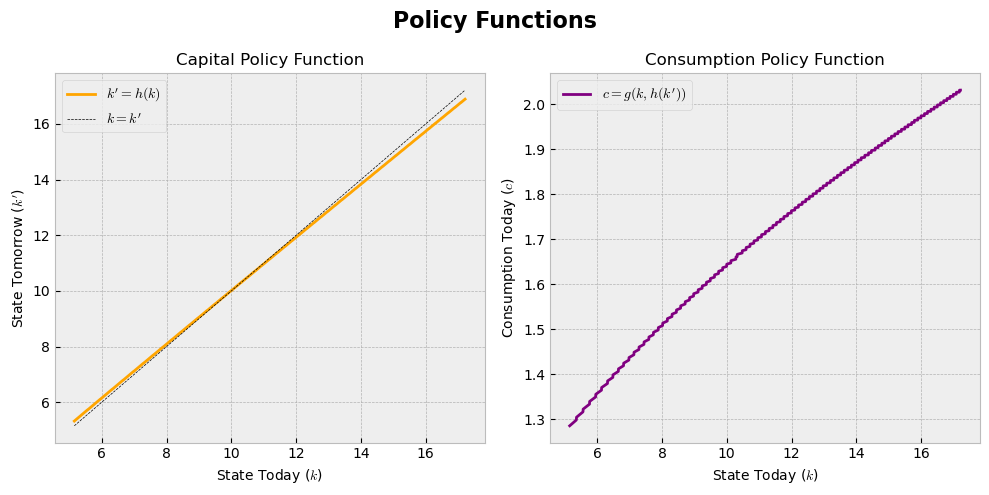

In [39]:
# Plotting
plot_policy(k_space, policy_k, policy_c)

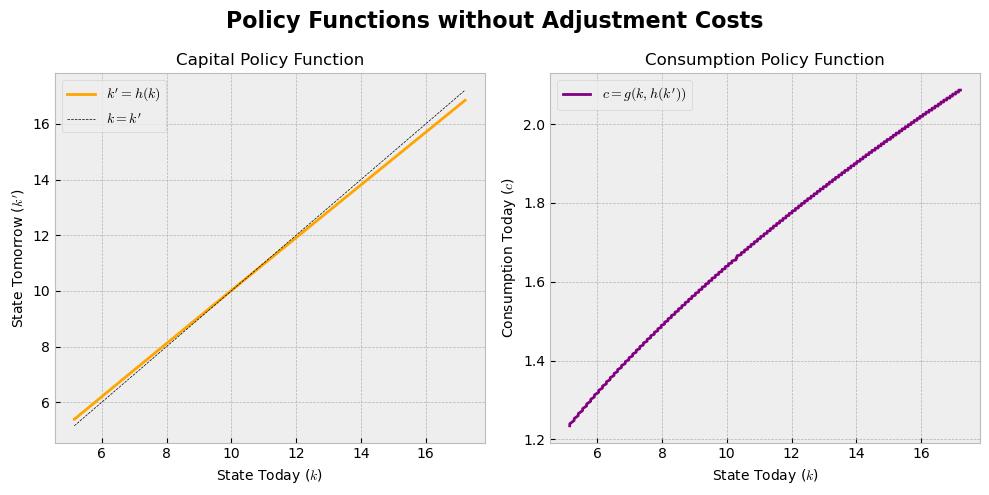

In [128]:
# Plotting without adjustment costs
plot_policy(
    k_space, policy_k_no_adj_costs, policy_c_no_adj_costs,
    title="Policy Functions without Adjustment Costs"
)

We see a few kinks in the consumption path, even with more than 2000 points in the grid.
The policy function $k' = h(k)$ is fairly smooth.

As an exercise, we do the same with just 30 points, where we can really see the kinks.
Although this comes at the expense of accuracy, the whole process is much faster, as expected.

  0%|          | 0/1000 [00:00<?, ?it/s]

 66%|██████▌   | 662/1000 [00:00<00:00, 12887.70it/s]


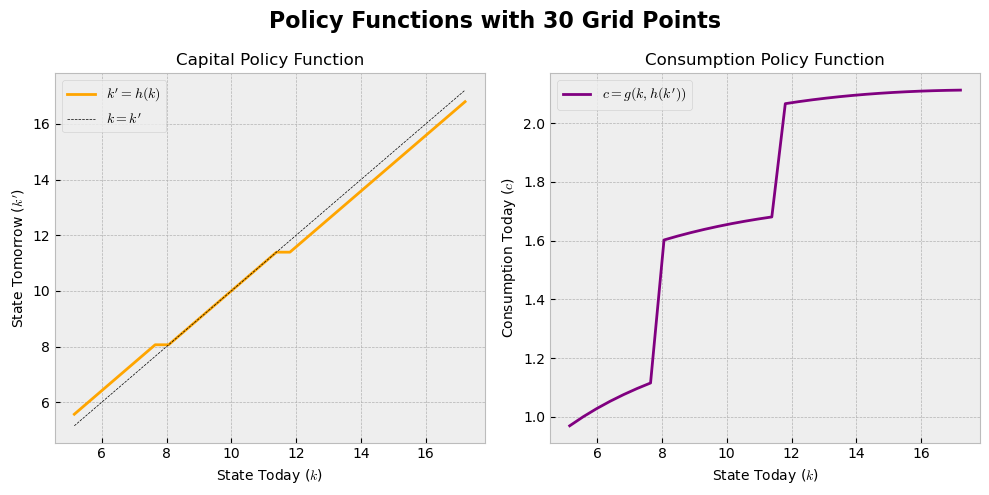

Number of value function iterations: 662.


In [129]:
# Defining the grid
k_space_few = np.linspace(k0, k_gr, 30)

# Calculating value function (only with adjustment costs)
t0 = time.time()
V_few, num_iter_value_few = value_function_iteration(k_space_few, param_dict)
time_value_iteration_few = time.time() - t0

# Policy functions
policy_k_few = policy_function(V_few, k_space_few, param_dict)
policy_c_few = consumption_capital(k=k_space_few, k_prime=policy_k_few, param_dict=param_dict)

# Plotting
plot_policy(k_space_few, policy_k_few, policy_c_few,
            title="Policy Functions with 30 Grid Points")

# Checking number of iterations
print(f"Number of value function iterations: {num_iter_value_few}.")

### (g) Paths

We first calculate the optimal capital path with the policy function, starting from $k_0 = \frac{k_{ss}}{2}$.

In [130]:
# Calculating k_path with the policy function
## k0
optimal_k_path_policy = [k0]

## Other values
for t in range(T):
    # The idea will be to get the closest value to k(t) in k_space and use 
    # this value to calculate the next state k(t+1)
    k_index = np.argmin(np.abs(k_space - optimal_k_path_policy[t]))

    # Next period k'
    optimal_k_path_policy.append(policy_k[k_index])

In [131]:
# Calculating paths
y_path_policy = output_path(optimal_k_path_policy, param_dict)

r_path_policy = r_path(optimal_k_path_policy, param_dict)

i_path_policy = investment_path(optimal_k_path_policy, param_dict)

c_path_policy = consumption_path(y_path_policy, i_path_policy)

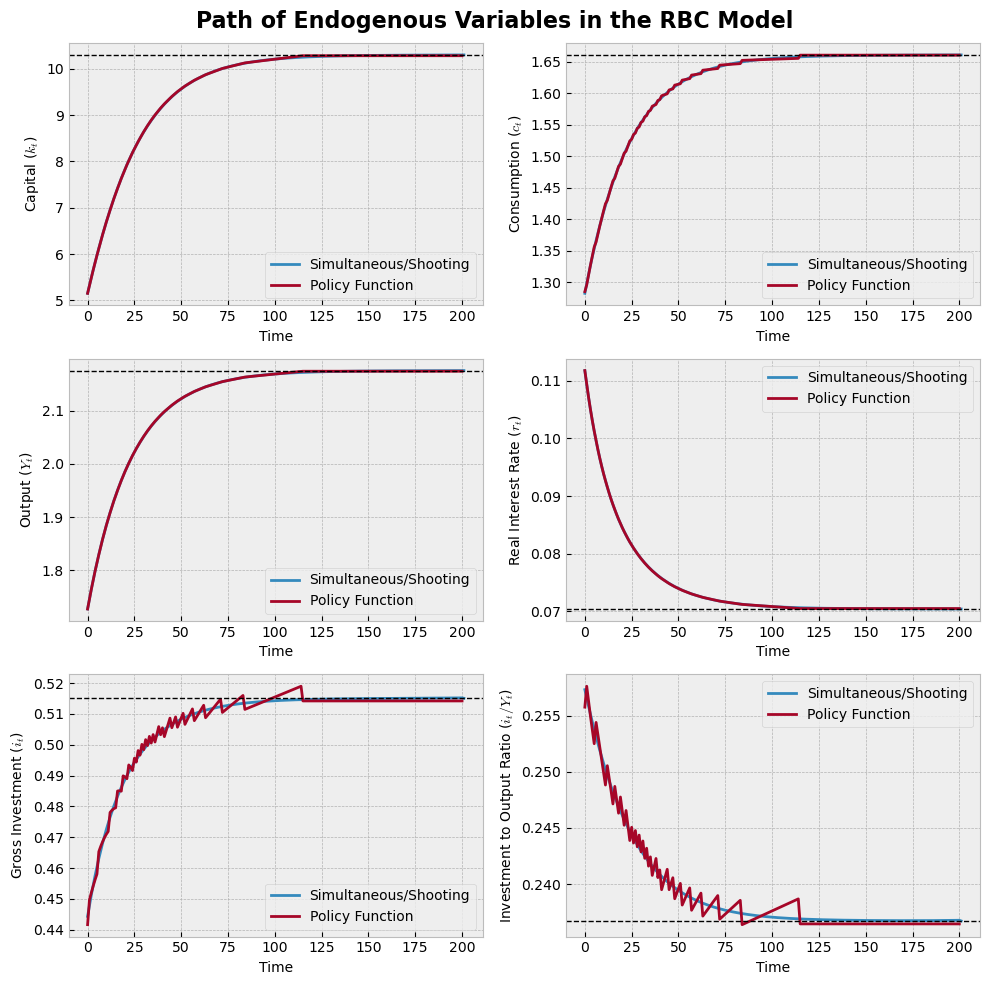

In [132]:
# Plotting paths
plot_paths(k_path_simultaneous, optimal_k_path_policy, k_ss,
            y_path_simultaneous, y_path_policy, y_ss,
            r_path_simultaneous, r_path_policy, r_ss,
            i_path_simultaneous, i_path_policy, i_ss,
            c_path_simultaneous, c_path_policy, c_ss,
            label1="Simultaneous/Shooting",
            label2="Policy Function")

We get very similar results as the ones we got with the previous methods, the exceptions being those related to consumption and investment.
Keep in mind these are $\phi = 5$.

These differences come from the kinks in consumption that are generated due to the discretization of the capital space.

We note, however, that in all methods the steady-state is reached after about 125 to 150 periods.

The simultaneous equation method was the fastest, followed by the shooting algorithm.
However, they relied on differentiability, as we used Euler Equations.

The Value Function iteration, on the other hand, was slower, but is executable with fewer assumptions ("it always works").
Furthermore, if we had more computational constraints, we could lower the number of grid points, which, as we saw in the end of item ***(f)***, lowers the computation time dramatically.

These times are shown below.

In [133]:
print(f"Time of Shooting Algorithm: {round(time_shooting, 1)} seconds.")
print(f"Time of Simultaneous Equations {round(time_simultaneous, 1)} seconds.")
print(f"Time of Value Function Iteration with > 2.000 points: {round(time_value_iteration, 1)} seconds.")
print(f"Time of Value Function Iteration with 30 points: {round(time_value_iteration_few, 1)} seconds.")

Time of Shooting Algorithm: 5.0 seconds.
Time of Simultaneous Equations 0.5 seconds.
Time of Value Function Iteration with > 2.000 points: 17.8 seconds.
Time of Value Function Iteration with 30 points: 0.1 seconds.


## Question 1.2. - Stochastic Equilibrium

### (h) Markov Chains and AR(1) Processes

Consider an AR(1) process of the form

$$
z_t = \mu (1 - \rho) + \rho z_{t-1} + \varepsilon_t,
\quad \text{where} \quad
\varepsilon_t \sim N(0, \sigma^2) \text{ i.i.d.}
$$

We can't quite implement the process because it implies continuous time, so we need to discretize it iinto a finite number of points and them compute how to transition between these points.

To do so, we could use Markov Chains using the Tauchen or Rouwenhorst methods.
We now describe how to do it using the Tauchen procedure.

First of all, we need to define a Markov Process.

A stochastic variable $z_t$ follows a first-order Markov Chain if, $\forall k > 1$ and for $i = 1, ..., N$,

$$
\mathbb{P}[z_t = \hat{z} | z_{t-1}, z_{t-2}, ..., z_{t-k}]
= \mathbb{P}[z_t = \hat{z} | z_{t-1}]
$$

That is, the probability of the variable attaining a given value given all its history is equal to the probability given only the previous observation.
Consequentially, all we need to calculate the expected the value of $z_{t+1}$ (tomorrow) is the value of $z_t$ (today).

In fancier words, to calculate the probability of the next state, we only need to know the current state and the **transition matrix** $\Pi$, where:

$$
\pi_{ij} = \mathbb{P}[z_{t+1} = z_j | z_t = z_i]
\quad \text{where} \quad
\sum_{j = 1}^N \pi_{ij} = 1
$$

$\pi_{ij}$ states the probability that you transition to state $j$ given that you are in state $i$.

An n-dimensional Markov Process is fully characterized by the state space $z \in \mathbb{Z} = \left\{z^1, ..., z^n \right\}$ and by the $n \times n$ transition matrix $\Pi$.

Now that we know what a Markov Process is, we can describe Tauchen's method.

#### Step 1: Choose Number of Grid Points

The first thing we need to do is to discretize the state space of $z_t$ into $N$ points $z_i$.
To do that, we obviously have to choose the number of grid points $N$.

The higher the $N$, the better the approximation of the continuous process, as this will improve the approximated probabilities of each state.

We have, however, a trade-off with computational efficiency, as a finer approximation requires more computational resources (known as *the curse of dimensionality*).

#### Step 2: Define Lower and Upper Bounds and Create the Grid

Once we have chosen $N$, we can define the lower and upper bounds of the grid.
In Tauchen's method, these are given by

$$
z_1 = \mu - r \sqrt{\frac{\sigma^2}{1 - \rho^2}}
\quad \text{and} \quad
z_N = \mu + r \sqrt{\frac{\sigma^2}{1 - \rho^2}},
$$

where $\mu \coloneqq \mathbb{E}[z]$ and $\frac{\sigma^2}{1 - \rho^2}$ is the variance of $z$.

$r$ is a scaling parameter that has to be chosen, reflecting the number of standard deviations we want to include in the range of our grid.
The grid should be large enough to encompass the solution, so the choice of $r$ has to reflect that.
This is partially reflected inn the fact that the bigger the variance of $z$, the wider the range of the grid.

It can't be too big, however, as then we would need a larger $N$ to recover the same approximation accuracy.

Therefore, a higher $r$ has the same effect (in terms of direction) as smaller $N$ for the accuracy of our approximation.

Note that, since $\varepsilon$ is normal, so is $z$, and thus the grid is symmetric around the mean $\mu$.

#### Step 3: Create the Grid

We will create an equispaced (linear) grid of $[z_1, z_N]$.
To do that, our interval between states will be

$$
d = \frac{z_N - z_1}{N - 1}
= \frac{2r}{N - 1} \sqrt{\frac{\sigma^2}{1 - \rho^2}}
$$

For notational convenience, define $\sigma_z = \sqrt{\frac{\sigma^2}{1 - \rho^2}}$.
Then, each point $z_i$, $i = 1, ..., N$, in the grid will be given by

$$
z_i = z_1 + (i - 1)d = z_1 + (i-1)\frac{2r \sigma_z}{N - 1}
$$

#### Step 4: Calculate the Borders

For each interval $[z_i, z_{i+1}]$, $i = 1, ... N-1$, we can calculate the average point $m_i$ between them, which will serve as the **borders of the interval** of $z_i$.
This is given by

$$
m_i = \frac{z_{i+1} + z_i}{2} 
= z_i + \frac{d}{2}
$$

Note that

$$
z_i \in 
\begin{cases}
(-\infty, m_1], & \, i = 1 \\
(m_{i-1}, m_i], & \, 1 < i < N \\
(m_{N-1}, \infty), & \, i = N \\
\end{cases}
$$

The higher the chosen $N$ (or lower $r$), the smaller the intervals and the better the approximation, which we describe in the next step.

#### Step 5: Compute the Transition Probabilities

We can use the border of the $z_i$'s interval to approximate the transition probabilities.
That is, we can approximate $\mathbb{P}[z_t = z_j | z_{t-1} = z_i]$ (the probability of being in state $i$ and transitioning to state $j$) by $\mathbb{P}[z_t \in [m_{j-1}, m_j] \mid z_i]$.

Since we know the DGP of $z_t = \mu (1 - \rho) + \rho z_{t-1} + \varepsilon_t$, we can write

\begin{align*}
\pi_{ij} 
&= \mathbb{P}[z_t = z_j | z_{t-1} = z_i] \\
&= \mathbb{P}[\mu (1 - \rho) + \rho z_i + \varepsilon_t = z_j] \\
&= \mathbb{P}[\mu (1 - \rho) + \rho z_i  + \varepsilon_t = z_j] \\
&\approx \mathbb{P}[\mu (1 - \rho) + \rho z_i  + \varepsilon_t \in [m_{j-1}, m_j]] \\
&= \mathbb{P}[m_{j-1} \leq \mu (1 - \rho) + \rho z_i  + \varepsilon_t \leq m_j] \\
&\approx \mathbb{P}[m_{j-1} \leq \mu (1 - \rho) + \rho z_i + \varepsilon_t \leq m_j] \\
&= \mathbb{P}[\mu (1 - \rho) + \rho z_i + \varepsilon_t \leq m_{j}] - \mathbb{P}[\mu (1 - \rho) + \rho z_i + \varepsilon_t \leq m_{j- 1}]
\end{align*}

Denoting by $\Phi$ the CDF of the standard normal, we can isolate $\varepsilon_t$ and standardize it to get that

\begin{align*}
\pi_{ij} 
& \approx
\mathbb{P}[\varepsilon_t \leq m_{j} - \mu (1 - \rho) - \rho z_i] - \mathbb{P}[\varepsilon_t \leq m_{j- 1} - \mu (1 - \rho) - \rho z_i]
\\
&= \Phi \left(\frac{m_{j} - \mu (1 - \rho) - \rho z_i}{\sigma} \right)
- \Phi \left(\frac{m_{j-1} - \mu (1 - \rho) - \rho z_i}{\sigma} \right)
\tag{Tauchen}
\end{align*}

for all $i$ and for $j = 2, ..., N-1$.
For $j=1$, we can take $m_{j-1}$ to be $-\infty$; for $j = N$, we can take $m_j$ to be $+\infty$.

And we are done!

Since we have our state space $[z_1, ..., z_N]$ and transition matrix $\Pi = [\pi_{ij}]$, we can fully characterize the entire Markov Process.

#### Step 6: Simulate the Chain 

To simulate the chain, we need to compute its cumulative distribution, given by

$$
\Pi_{ij}^c = \sum_{k = 1}^j \pi_{ik}
$$

This tells us the probability that the Markov Chain is in a state lower or equal to $j$, given that it was previously in state $i$.

To simulate the chain, we set a initial state $z_0$ and simulate $T$ random number from a $U[0, 1]$, where $T$ is the number of periods of our simulations.
Denote this sequence of probabilities by $(p_t)_{t=1}^T$.

If the chain was in state $i$ in $t-1$, we need to find the index $j$ such that

$$
\Pi_{i, j-1} < p_t < \Pi_{i, j}, \quad j > 2
$$

$z_j$ will be the state in period $t$. If $p_t < \pi_{i, 1}$, then $z_1$ is the next state.

### (i) Tauchen's Method

We now implement the Tauchen Method numerically, with $T = 5000$ realizations.

#### Markov Process

In [134]:
# Parameters
## DGP
rho = 0.9
rho_alt = 0.98

## Structural
T_markov = 5000
variance_error = 0.05

## Chosen parameters
r_markov = 3
N_markov = 7

In [135]:
def tauchen_method_ar1(constant, rho, variance_error, r, N):
    """
    Implements Tauchen's method to generate a markov chain
    Returns objects that characterize the markov process: the state space grid and the transition matrix

    Args:
        constant_z (float): constant term in the DGP
        rho (float): correlation parameter
        variance_error (float): variance of the error
        r (float): number of standard deviations to extend the grid in
        N (float): number of grid points
    """

    # Statistics of the process
    mean_dgp = constant / (1 - rho)
    std_dev_dgp = np.sqrt(variance_error / (1 - rho ** 2))
    std_dev_error = variance_error ** (1 / 2)

    # Compute the lower and upper bound
    z1 = mean_dgp - r * std_dev_dgp
    zN = mean_dgp + r * std_dev_dgp

    # Creating state space grid grid
    state_grid = np.linspace(z1, zN, N)

    # Creating borders (median points between zt)
    ## Skeleton
    borders_grid = []

    ## Looping to fill
    for i in range(N-1):
        borders_grid.append((state_grid[i] + state_grid[i + 1]) / 2)

    ## As array
    borders_grid = np.array(borders_grid)

    # Calculating transition matrix
    ## Skeleton
    transition_matrix = np.zeros([N, N])

    ## Populating matrix
    for i in range(N):
        for j in range(N):
            # Calculating standardized statistics, as in equation (Tauchen)
            if j == 0:
                mj_standard = (borders_grid[j] - rho * state_grid[i] - constant) / std_dev_error
                transition_matrix[i, j] = stats.norm.cdf(mj_standard)
            elif j == N - 1:
                mj1_standard = (borders_grid[j-1] - rho * state_grid[i] - constant) / std_dev_error
                transition_matrix[i, j] = 1 - stats.norm.cdf(mj1_standard)
            else:
                mj_standard = (borders_grid[j] - rho * state_grid[i] - constant) / std_dev_error
                mj1_standard = (borders_grid[j-1] - rho * state_grid[i] - constant) / std_dev_error

                transition_matrix[i, j] = stats.norm.cdf(mj_standard) - stats.norm.cdf(mj1_standard)
    
    # Returning objects that characterize the Markov chain
    return state_grid, transition_matrix

In [136]:
# Characterizing the markov process with rho = .9
state_grid, transition_matrix  = tauchen_method_ar1(
    constant=0, rho=rho, variance_error=variance_error, 
    r=r_markov, N=N_markov
)

# Printing transition matrix of rho = .9
# Note that the sum of the rows equals 1, as desired
print(np.around(transition_matrix, 3))

[[0.677 0.32  0.003 0.    0.    0.    0.   ]
 [0.054 0.7   0.244 0.001 0.    0.    0.   ]
 [0.    0.084 0.736 0.179 0.001 0.    0.   ]
 [0.    0.    0.125 0.749 0.125 0.    0.   ]
 [0.    0.    0.001 0.179 0.736 0.084 0.   ]
 [0.    0.    0.    0.001 0.244 0.7   0.054]
 [0.    0.    0.    0.    0.003 0.32  0.677]]


In [137]:
# Characterizing the markov process with rho = .98
state_grid_alt, transition_matrix_alt  = tauchen_method_ar1(
    constant=0, rho=rho_alt, variance_error=variance_error, 
    r=r_markov, N=N_markov
)

# Printing transition matrix of rho = .98
print(np.around(transition_matrix_alt, 3))

[[0.986 0.014 0.    0.    0.    0.    0.   ]
 [0.003 0.986 0.01  0.    0.    0.    0.   ]
 [0.    0.004 0.988 0.008 0.    0.    0.   ]
 [0.    0.    0.006 0.988 0.006 0.    0.   ]
 [0.    0.    0.    0.008 0.988 0.004 0.   ]
 [0.    0.    0.    0.    0.01  0.986 0.003]
 [0.    0.    0.    0.    0.    0.014 0.986]]


Due to higher persistence, we have a much higher chance of staying in the current state when $\rho = .98$.

#### Simulating Markov Chains

In [138]:
def simulate_markov_chain(state_grid, transition_matrix, T,
                          initial_value=None):
    """
    Simulates a Markov chain of length T given the characterization objects
    (state_grid, transition_matrix).
    If passed, initial_value must be an element of state_grid.
    """

    # Getting number of states
    N = state_grid.shape[0]

    # Computing cumulative distribution of the markov chain
    ## Skeleton
    cdf_markov_matrix = np.zeros([N, N])

    ## Looping
    for i in range(N):
        for j in range(N):
            # Summing row i of transition matrix until column j
            cdf_markov_matrix[i, j] = np.sum(transition_matrix[i, :j + 1])
    
    # Skeleton of markov process
    simulated_values = np.zeros(T)

    # Initial state
    ## If not specified, create at random
    if initial_value is None:
        index_state_today = np.random.choice(N)
        state_today = state_grid[index_state_today]
        simulated_values[0] = state_today
    ## If specified, use it as the initial state and grab its index in the grid
    else:
        index_state_today = np.where(state_grid == initial_value)[0][0]
        simulated_values[0] = initial_value

    # Simulating
    for t in range(1, T):
        # Getting random index with probabilities associated to current state
        # transition_matrix[index_state_today]: row i of transition matrix (sums to 1)
        index_state_tomorrow = np.random.choice(
            N, p=transition_matrix[index_state_today]
        )

        # State tomorrow
        state_tomorrow = state_grid[index_state_tomorrow]

        # Adding to array
        simulated_values[t] = state_tomorrow

        # Updating index
        index_state_today = index_state_tomorrow
    
    # Returning simulation
    return simulated_values

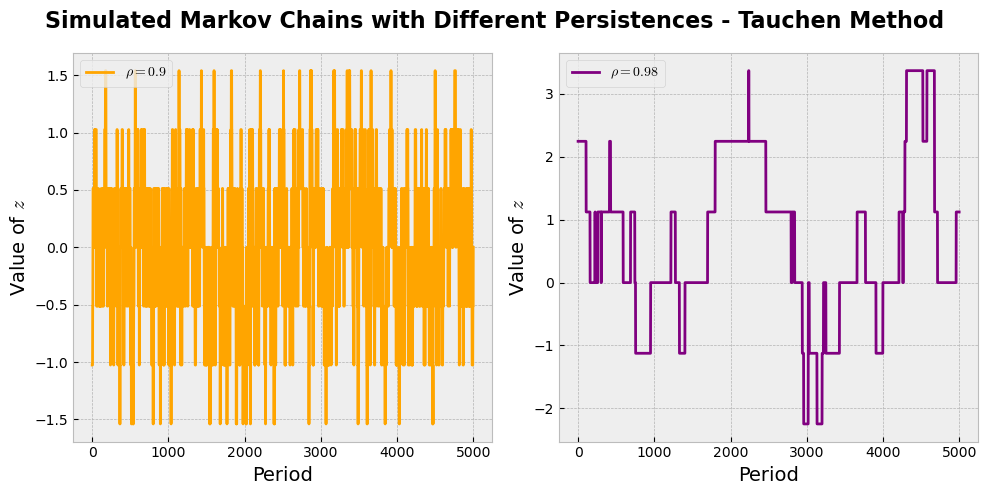

In [139]:
# Simulated values
simulated_values_markov = simulate_markov_chain(state_grid, transition_matrix, T_markov)
simulated_values_markov_alt = simulate_markov_chain(state_grid_alt, transition_matrix_alt, T_markov)

# Plotting
# Sequence of periods
sequence_periods_markov = range(T_markov)

# Object and title
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Simulated Markov Chains with Different Persistences - Tauchen Method", 
             fontsize=16, fontweight='bold')

# First graph: rho = .9
ax[0].plot(sequence_periods_markov, simulated_values_markov, 
           label=r"$\rho = 0.9$", color='orange')
ax[0].set_xlabel("Period", fontsize=14)
ax[0].set_ylabel(r"Value of $z$", fontsize=14)
ax[0].legend()
ax[0].grid(True)

# Second graph: rho = .98
ax[1].plot(sequence_periods_markov, simulated_values_markov_alt, 
           label=r"$\rho = 0.98$", color='purple')
ax[1].set_xlabel("Period", fontsize=14)
ax[1].set_ylabel(r"Value of $z$", fontsize=14)
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

We see that the process with the higher persistence $\rho = 0.98$ is far more stable, in the sense that we tend to stay in a given state for a larger period of time.

#### Mean and Variance

To end, we calculate the empirical means and variance of the processes and compare them to the theoretical values.

In [140]:
# True metrics
true_var_markov = variance_error / (1 - rho **2)
true_var_markov_alt = variance_error / (1 - rho_alt **2)

# Sample metrics (without dof correction)
mean_markov_simulated = np.mean(simulated_values_markov)
mean_markov_simulated_alt = np.mean(simulated_values_markov_alt)

var_markov_simulated = np.var(simulated_values_markov, ddof=0)
var_markov_simulated_alt = np.var(simulated_values_markov_alt, ddof=0)

# Printing
print(f"rho = {rho}")
print(f"True Mean: 0 | Sample Mean: {round(mean_markov_simulated, 2)}")
print(f"True Variance: {round(true_var_markov, 2)} | Sample Variance: {round(var_markov_simulated, 2)}")

print(f"\nrho = {rho_alt}")
print(f"True Mean: 0 | Sample Mean: {round(mean_markov_simulated_alt, 2)}")
print(f"True Variance: {round(true_var_markov_alt, 2)} | Sample Variance: {round(var_markov_simulated_alt, 2)}")

rho = 0.9
True Mean: 0 | Sample Mean: -0.0
True Variance: 0.26 | Sample Variance: 0.38

rho = 0.98
True Mean: 0 | Sample Mean: 0.66
True Variance: 1.26 | Sample Variance: 1.75


The metrics are fairly close to their true values, mainly when $\rho = .9$.
When $\rho = .98$ (closer to an $I(1)$ process), the differences are bigger.

### (j) Rouwenhorst's Method

#### Markov Process

We will use *quantecon*'s implementation of the Rouwenhorst Method (can't be more reproducible than that =)). 

Here is the [reference](https://quanteconpy.readthedocs.io/en/latest/markov/approximation.html) for the package.
Theoretical guidance is at the end of Lecture 3.

In [141]:
# Calculating grids and transition matrices
## rho = .9
rouwenhorst_markov = rouwenhorst(
    n=N_markov, rho=rho, sigma=variance_error**(1 / 2), mu=0
)

## rho = .98
rouwenhorst_markov_alt = rouwenhorst(
    n=N_markov, rho=rho_alt, sigma=variance_error**(1 / 2), mu=0
)

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_74165/384250661.py:3: UserWarning: The API of rouwenhorst has changed from `rouwenhorst(n, ybar, sigma, rho)` to `rouwenhorst(n, rho, sigma, mu=0.)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  rouwenhorst_markov = rouwenhorst(
/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_74165/384250661.py:8: UserWarning: The API of rouwenhorst has changed from `rouwenhorst(n, ybar, sigma, rho)` to `rouwenhorst(n, rho, sigma, mu=0.)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  rouwenhorst_markov_alt = rouwenhorst(


In [142]:
# Getting state grid and transition matrix of rho = .9
state_grid_rouwen = rouwenhorst_markov.state_values
transition_matrix_rouwen = rouwenhorst_markov.P

# Printing transition matrix
# Note that the each row sums to one
print(np.around(transition_matrix_rouwen, 3))

[[0.735 0.232 0.031 0.002 0.    0.    0.   ]
 [0.039 0.745 0.195 0.02  0.001 0.    0.   ]
 [0.002 0.078 0.751 0.156 0.012 0.    0.   ]
 [0.    0.006 0.117 0.753 0.117 0.006 0.   ]
 [0.    0.    0.012 0.156 0.751 0.078 0.002]
 [0.    0.    0.001 0.02  0.195 0.745 0.039]
 [0.    0.    0.    0.002 0.031 0.232 0.735]]


In [143]:
# Getting state grid and transition matrix of rho = .98
state_grid_rouwen_alt = rouwenhorst_markov_alt.state_values
transition_matrix_rouwen_alt = rouwenhorst_markov_alt.P

# Printing transition matrix
print(np.around(transition_matrix_rouwen_alt, 3))

[[0.941 0.057 0.001 0.    0.    0.    0.   ]
 [0.01  0.942 0.048 0.001 0.    0.    0.   ]
 [0.    0.019 0.942 0.038 0.001 0.    0.   ]
 [0.    0.    0.029 0.942 0.029 0.    0.   ]
 [0.    0.    0.001 0.038 0.942 0.019 0.   ]
 [0.    0.    0.    0.001 0.048 0.942 0.01 ]
 [0.    0.    0.    0.    0.001 0.057 0.941]]


We see that Rouwenhort's method is "more sparse", in the sense that more states have positive transition probabilities.
This is true for both values of $\rho$.

#### Simulating Markov Chains

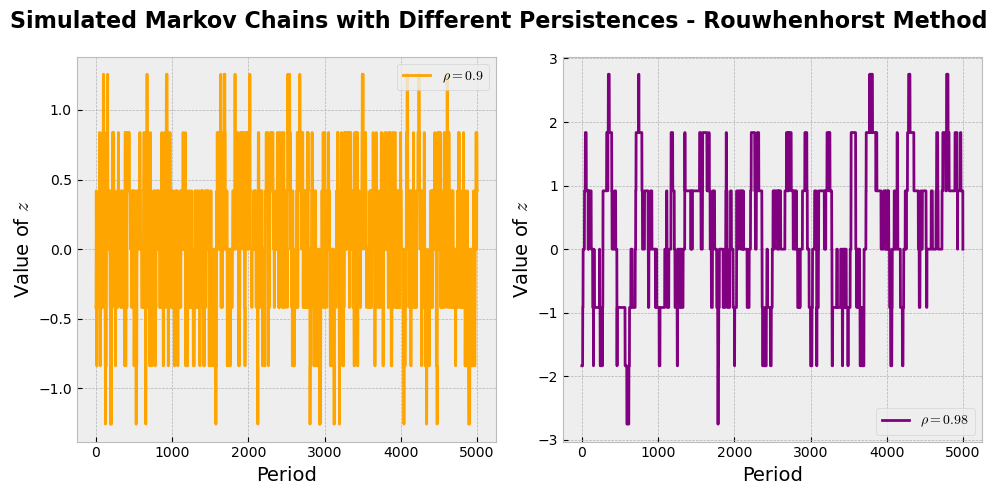

In [144]:
# Simulated values
simulated_values_markov_rouwen = simulate_markov_chain(
    state_grid_rouwen, transition_matrix_rouwen, T_markov
)
simulated_values_markov_rouwen_alt = simulate_markov_chain(
    state_grid_rouwen_alt, transition_matrix_rouwen_alt, T_markov
)

# Plotting
# Object and title
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Simulated Markov Chains with Different Persistences - Rouwhenhorst Method", 
             fontsize=16, fontweight='bold')

# First graph: k' x k
ax[0].plot(sequence_periods_markov, simulated_values_markov_rouwen, 
           label=r"$\rho = 0.9$", color='orange')
ax[0].set_xlabel("Period", fontsize=14)
ax[0].set_ylabel(r"Value of $z$", fontsize=14)
ax[0].legend()
ax[0].grid(True)

# Second graph: k x k'
ax[1].plot(sequence_periods_markov, simulated_values_markov_rouwen_alt, 
           label=r"$\rho = 0.98$", color='purple')
ax[1].set_xlabel("Period", fontsize=14)
ax[1].set_ylabel(r"Value of $z$", fontsize=14)
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

#### Mean and Variance

In [145]:
# Sample metrics (without dof correction)
mean_markov_simulated_rouwen = np.mean(simulated_values_markov_rouwen)
mean_markov_simulated_rouwen_alt = np.mean(simulated_values_markov_rouwen_alt)

var_markov_simulated_rouwen = np.var(simulated_values_markov_rouwen, ddof=0)
var_markov_simulated_rouwen_alt = np.var(simulated_values_markov_rouwen_alt, ddof=0)

# Printing
## Tauchen
print("TAUCHEN'S METHOD")
print(f"\trho = {rho}")
print(f"\t\tTrue Mean: 0 | Sample Mean: {round(mean_markov_simulated, 2)}")
print(f"\t\tTrue Variance: {round(true_var_markov, 2)} | Sample Variance: {round(var_markov_simulated, 2)}")

print(f"\trho = {rho_alt}")
print(f"\t\tTrue Mean: 0 | Sample Mean: {round(mean_markov_simulated_alt, 2)}")
print(f"\t\tTrue Variance: {round(true_var_markov_alt, 2)} | Sample Variance: {round(var_markov_simulated_alt, 2)}")

## Rouwenhorst
print("\nROUWENHORST'S METHOD")
print(f"\trho = {rho}")
print(f"\t\tTrue Mean: 0 | Sample Mean: {round(mean_markov_simulated_rouwen, 2)}")
print(f"\t\tTrue Variance: {round(true_var_markov, 2)} | Sample Variance: {round(var_markov_simulated_rouwen, 2)}")

print(f"\trho = {rho_alt}")
print(f"\t\tTrue Mean: 0 | Sample Mean: {round(mean_markov_simulated_rouwen_alt, 2)}")
print(f"\t\tTrue Variance: {round(true_var_markov_alt, 2)} | Sample Variance: {round(var_markov_simulated_rouwen_alt, 2)}")

TAUCHEN'S METHOD
	rho = 0.9
		True Mean: 0 | Sample Mean: -0.0
		True Variance: 0.26 | Sample Variance: 0.38
	rho = 0.98
		True Mean: 0 | Sample Mean: 0.66
		True Variance: 1.26 | Sample Variance: 1.75

ROUWENHORST'S METHOD
	rho = 0.9
		True Mean: 0 | Sample Mean: 0.05
		True Variance: 0.26 | Sample Variance: 0.25
	rho = 0.98
		True Mean: 0 | Sample Mean: 0.29
		True Variance: 1.26 | Sample Variance: 1.16


We see that Rouwenhorst's method is overall better in approximating the true moments, specially in the case of $\rho = .98$ and of both variances.
This is expected, as it uses a GMM estimator in its implementation.

This is also consistent with [Karen Kopecky's notes](https://www.karenkopecky.net/Teaching/eco613614/Notes_DiscretizingAR1s.pdf) (available at the end of Lecture 3), where she recommends using Rouwenhorst's method on AR(1) processes with $\rho \geq .9$.

### (k) Competitive Equilibrium with Uncertainty

Assume now that productivity follows an AR(1) process:

$$
\ln A_t = \rho \ln A_{t-1} + \varepsilon_t,
$$

with $\rho = .95$ and $\varepsilon_t \sim N(0, 0.01)$.

Note that we can just change indexes to write

$$
\ln A_{t+1} = \rho \ln A_{t} + \varepsilon_{t+1},
$$

From itens ***(e)*** and ***(f)***, the recursive competitive equilibrium *without uncertainty* was given by

- Consumers: $V(k) = \max_{k' \geq 0} \left\{\frac{1}{1-\sigma} \left[r k + \omega - k' + (1 - \delta)k - k \frac{\phi}{2} \left( \frac{k'}{k} - 1 \right)^2 \right]^{1 - \sigma} + \beta V(k') \right\}$;
- Firms: $\max_{K} \left\{AK^\alpha - r K \right\}$, and so $\alpha A K^{\alpha - 1} = r$
- Market clearing for capital: $K = k$;
- Market clearing for goods: $Y = AK^\alpha = c + i = r k + \omega$

#### Households

The productivity change happens at the beginning of each period.

Thus, agents observe the current shock and take the expected value of it tomorrow which, given the AR(1) nature, depends on the value of the shock today.

We can write then write the recursive formulation of the problem as

$$
V_i(k, A) = \max_{k' \geq 0} 
\left\{
    \frac{1}{1-\sigma}
\left[
    r k + \omega
    - k' + (1 - \delta)k - k \frac{\phi}{2} \left( \frac{k'}{k} - 1 \right)^2
\right]^{1 - \sigma}
+ \beta \mathbb{E}_i \left[V_i(k', A') \right]
\right\}
\tag{Household Uncertainty}
$$

subject to 

$$
\ln A' = \rho \ln A + \varepsilon',
\quad \text{where} \quad 
\varepsilon' \sim N(0, 0.01)
$$

where the subscripts $i = 1,..., N$ denotes the possible current states and $\mathbb{E}_i$ is the expected operator conditional on the current information/state.

#### Firms

The firm's problem is one of maximizing at every $t$, and does not depend on any future variable.
Since the firm observes the current shock, the problem remains the same.
Using the recursive notation,

$$
\max_{K} \left\{AK^\alpha - r K \right\}
$$

which gives the usual FOC

$$
\alpha A K^{\alpha - 1} = r
$$

#### Market Clearing

For markets to clear, it must be that

$$
K = k
\tag{Capital Uncertainty}
$$

and

$$
Y = AK^\alpha = c + i = r k + \omega,
\tag{Goods Uncertainty}
$$

which is the same as before.

#### Social Planner

From ***(a)***, we can write the planner's problem *without uncertainty* as 

$$
\max_{k_t} \sum_{t=0}^\infty \beta^t u\left(A k_t^\alpha + (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t - k_{t+1}\right)
$$

with $u(c_t) = \frac{c_t^{1-\sigma}}{1-\sigma}$.

With uncertainty, he/she maximizes this expected value

$$
\max_{k_t} \sum_{t=0}^\infty \beta^t \mathbb{E}_0 \left[ u\left(A_t k_t^\alpha + (1 - \delta)k_t - \frac{\phi}{2} \left( \frac{k_{t+1}}{k_t} - 1 \right)^2 k_t - k_{t+1}\right) \right]
$$

In the recursive formulation, this is equivalent to

$$
V_i(k, A) = \max_{k' \geq 0} 
\left\{
 u\left(
    Ak^\alpha
    - k' + (1 - \delta)k - k \frac{\phi}{2} \left( \frac{k'}{k} - 1 \right)^2
\right)
+ \beta \mathbb{E}_i \left[V_i(k', A') \right]
\right\}
\tag{Social Uncertainty}
$$

subject to 

$$
\ln A' = \rho \ln A + \varepsilon',
\quad \text{where} \quad 
\varepsilon' \sim N(0, 0.01)
$$

where the subscripts $i = 1,..., N$ denotes the possible current states and $\mathbb{E}_i$ is the expected operator conditional on the current information/state.

This is exactly the same as the households problem when incorporating the market clearing conditions and substituting $u(c) = \frac{c^{1-\sigma}}{1-\sigma}$.

### (l) Solving the Method with Uncertainty

#### Discretizing Productivity Space

Recall that productivity is given by

$$
\ln A_t = \rho \ln A_{t-1} + \varepsilon_t,
$$

with $\rho = .95$ and $\varepsilon_t \sim N(0, 0.01)$.

We will now discretize the $\ln A_t$ space, exponentiating at the end to get to actual productivity.

In [146]:
# Parameters
rho_model = .95
N_markov_model = 11
variance_error_model = 0.01

In [147]:
# Calculating grids and transition matrices
rouwenhorst_ln_productivity = rouwenhorst(
    n=N_markov_model, rho=rho_model, sigma=variance_error_model**(1 / 2), mu=0
)

# Getting state grid and transition matrix of ln(A)
state_grid_ln_productivity = rouwenhorst_ln_productivity.state_values
transition_matrix_productivity = rouwenhorst_ln_productivity.P

/var/folders/b5/2c62lp8155v1w__5nvqtl6ch0000gn/T/ipykernel_74165/319468163.py:2: UserWarning: The API of rouwenhorst has changed from `rouwenhorst(n, ybar, sigma, rho)` to `rouwenhorst(n, rho, sigma, mu=0.)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  rouwenhorst_ln_productivity = rouwenhorst(


In [148]:
# Printing transition matrix
print(np.around(transition_matrix_productivity, 3))

[[0.776 0.199 0.023 0.002 0.    0.    0.    0.    0.    0.    0.   ]
 [0.02  0.781 0.18  0.018 0.001 0.    0.    0.    0.    0.    0.   ]
 [0.001 0.04  0.785 0.16  0.014 0.001 0.    0.    0.    0.    0.   ]
 [0.    0.002 0.06  0.787 0.14  0.011 0.    0.    0.    0.    0.   ]
 [0.    0.    0.003 0.08  0.789 0.12  0.008 0.    0.    0.    0.   ]
 [0.    0.    0.    0.005 0.1   0.789 0.1   0.005 0.    0.    0.   ]
 [0.    0.    0.    0.    0.008 0.12  0.789 0.08  0.003 0.    0.   ]
 [0.    0.    0.    0.    0.    0.011 0.14  0.787 0.06  0.002 0.   ]
 [0.    0.    0.    0.    0.    0.001 0.014 0.16  0.785 0.04  0.001]
 [0.    0.    0.    0.    0.    0.    0.001 0.018 0.18  0.781 0.02 ]
 [0.    0.    0.    0.    0.    0.    0.    0.002 0.023 0.199 0.776]]


In [149]:
# Exponentiating the shock space
state_grid_productivity = np.exp(state_grid_ln_productivity)

# Printing the producctivity space
np.around(state_grid_productivity, 2)

array([0.36, 0.44, 0.54, 0.67, 0.82, 1.  , 1.22, 1.5 , 1.84, 2.25, 2.75])

#### Capital Space

Since we need a consumption and utility matrix for each possible shock (11 in our case), we will reduce the number of state in our grid from 2412 to 500.

Initial testing revealed that the policy function was constrained by the discrete state space, which was originally from $k_0 = \frac{k_{ss}}{2}$ until $k_{GR}$, which is the interval $[5.15, 17.2]$. 

We expanded to $[3, 23]$ and upped the number of points to 750.

In [150]:
# Defining the capital grid / state space
# k_space_uncertainty = np.linspace(k0, k_gr, 500)
k_space_uncertainty = np.linspace(3, 23, 750)
# k_space_uncertainty = k_space.copy()

#### Consumption and Utility Functions

We need to create a consumption and utility matrix conditional on each possible shock (we have 11 in our case).
This is because the current shock happens at beginning of the period, and so its current value is known to agents.

To do so, we will use the same functions as before, but passing a different value of $A_t$ in each case.

In [151]:
def get_utility_conditional_on_shock(k, k_prime, param_dict_uncertainty, shock_space):
    """
    Calculates utility matrices as a function of capital today, tomorrow
    and parameters, conditional on each value of productivitiy.
    Returns an array of matrices of utility for each possible combination of k, k_prime and shock
    """
    # Number of shocks and capital states
    n_shock_space = shock_space.shape[0]
    n_capital_space = k.shape[0]

    # Array
    conditional_utility_array = np.zeros([n_shock_space, n_capital_space, n_capital_space])

    # Loop to fill arrays
    for index, productivity in enumerate(shock_space):
        # Filling
        param_dict_uncertainty['A'] = productivity

        # Calculating consumption and utility
        ## Recall we want k today in the columns and k' tomorrow in the rows, so we transpose at the end
        conditional_utility_array[index] = utility_capital(k, k_prime, param_dict_uncertainty).T

    # Changing back
    param_dict_uncertainty['A'] = 1

    # Returning
    return conditional_utility_array

#### Value Functions

We have two modify two things: verify optimality for each productivity state and use the expected value of the value function tomorrow in the iteration.

In [152]:
def value_function_iteration_uncertainty(k_space, shock_space, shock_transition_matrix,
                                         param_dict, tol=1e-6, max_iter=1000):
    """
    Iterating through vectors (function approximations) until we reach a fixed point conditional on all shocks.
    Ideally, we would pass the utility_capital function an its parameters as arguments to make this more general.
    """

    # Parameters
    beta = param_dict['beta']

    # Assuring spaces are arrays
    k_space = np.array(k_space)
    shock_space = np.array(shock_space)

    # Getting dimensions of matrices and vectors
    num_capital_spaces = k_space.shape[0]
    num_shock_spaces = shock_space.shape[0]

    # Initial guess
    ## Matrix of conditional value functions
    ## V approximates the value function: for every k and A, it should give the maximum value attained
    V = np.zeros([num_shock_spaces, num_capital_spaces])
    V_new = np.ones([num_shock_spaces, num_capital_spaces])

    # Creating meshgrid, which give coordinates of k and k'
    k_matrix, k_prime_matrix = np.meshgrid(k_space, k_space)

    # Array with utilities for each possible combination of k, k' and shock value
    ## For each shock value (first dimension), returns a matrix of utility for space tomorrow
    ## in rows (second dimension) and state today in columns (third dimension)
    u_array_conditional_shock = get_utility_conditional_on_shock(
        k=k_matrix, k_prime=k_prime_matrix, 
        shock_space=shock_space, param_dict_uncertainty=param_dict
    )

    # Iterating
    for num_iter in tqdm(range(max_iter)):
        # Calculating matrix of possible values of V: for every state today (column),
        # what is the value of each state tomorrow (row) conditional on each shock

        ## Loop
        for index_shock in range(num_shock_spaces):
            # Expected value tomorrow
            expected_V_tomorrow = shock_transition_matrix[[index_shock]] @ V

            # Transforming into a vector
            expected_V_tomorrow = expected_V_tomorrow[0, :]

            ## Important: in numpy, operations between matrices (first term) and vectors (second term)
            ## are done column-wise. That is, we add B * V(k', A) to each column, which is exactly 
            ## what we want, as rows represent k' (see matrix on slide 27 of Lecture 4)
            matrix_state_values = u_array_conditional_shock[index_shock] + beta * expected_V_tomorrow

            # Calculating maximum value for each state today (columns, axis=1)
            # That is, for each column, we are grabbing the row (next state) which maximizes V for that state
            # (conditional on the productivity shock we are on)
            V_new[index_shock] = np.max(matrix_state_values, axis=1)

        # Checking if we found the fixed point using the sup norm FOR EACH shock
        # That is, we want the loop to stop when all conditions are satisfied
        if np.max(np.abs(V - V_new)) < tol:
            break
        else:
            V = V_new.copy() # this was a pain to discover that .copy() was necessary

    # Assessing convergence
    if num_iter >= max_iter - 1:
        print("Value function did not converge")

    # Returning: V_new is now a matrix with the first dimension (rows) being the productivity shocks
    return V_new, num_iter

In [153]:
# Calculating the value function
t0 = time.time()
V_matrix_uncertainty, num_iter_value_uncertainty = value_function_iteration_uncertainty(
    k_space=k_space_uncertainty, shock_space=state_grid_productivity, 
    shock_transition_matrix=transition_matrix_productivity, param_dict=param_dict
)
time_value_iteration_uncertainty = time.time() - t0

 66%|██████▋   | 664/1000 [00:23<00:11, 28.32it/s]


In [154]:
# Calculating the value function without uncertainty (useful for checks)
t0 = time.time()
V2, num_iter_value2 = value_function_iteration_uncertainty(
    k_space=k_space, shock_space=np.array([1]), 
    shock_transition_matrix=np.array([[1]]), param_dict=param_dict
)
time_value_iteration2 = time.time() - t0

 66%|██████▌   | 662/1000 [00:18<00:09, 35.72it/s]


In [155]:
# Seeing if value functions without uncertainty calculated with the different functions match
np.allclose(V, V2[0], rtol=0, atol=1e-6)

True

In [156]:
# Printing iterations and time
print(f"WITH PRODUCTIVITY UNCERTAINTY")
print(f"Number of Capital States: {len(k_space_uncertainty)}.")
print(f"Number of iterations: {num_iter_value_uncertainty}")
print(f"Seconds: {round(time_value_iteration_uncertainty, 0)}")

print(f"\nWITHOUT PRODUCTIVITY UNCERTAINTY")
print(f"Number of Capital States: {len(k_space)}.")
print(f"Number of iterations: {num_iter_value2}")
print(f"Secons: {round(time_value_iteration2, 0)}")

WITH PRODUCTIVITY UNCERTAINTY
Number of Capital States: 750.
Number of iterations: 664
Seconds: 25.0

WITHOUT PRODUCTIVITY UNCERTAINTY
Number of Capital States: 2412.
Number of iterations: 662
Secons: 20.0


#### Policy Function

We now have to find the policy function $k' = h(k)$ (which solves *(Household Uncertainty)*) and $c = g(k, k') = g(g, h(k))$ through the restriction.

We have to do this for each realization of the shock (recall that the current shock happens at the beginning of the period, so it is known).

In [157]:
def policy_function(V, k_space, param_dict):
    """
    Returns a vector (approximation of a function) that, for every state today,
    gives the optimal state tomorrow.
    """
    # Relevant parameters
    beta = param_dict['beta']

    # Creating meshgrid, which give coordinates of k and k'
    k_matrix, k_prime_matrix = np.meshgrid(k_space, k_space)

    # Matrix with utilities for each possible combination of k and k'
    u_matrix = utility_capital(k=k_matrix, k_prime=k_prime_matrix, param_dict=param_dict).T

    # Calculating matrix of values of state tomorrow x state today
    matrix_state_values = u_matrix + beta * V
    
    # Idea: find indexes of values which give the optimal k' given k
    ## For each column (state today), we are finding the (index of) k' which maximizes the value
    ## The only difference from the value iteration is using np.argmax instead of np.max
    optimal_indexes = np.argmax(matrix_state_values, axis=1)

    # Finding the optimal values of k' for each k
    return k_space[optimal_indexes]

In [158]:
# Getting dimensions
num_capital_spaces = k_space_uncertainty.shape[0]
num_shock_spaces = state_grid_productivity.shape[0]

# Skeleton
policy_k_uncertainty_matrix = np.zeros([num_shock_spaces, num_capital_spaces])

# Looping to calculate policy function for each state
for num_space in range(num_shock_spaces):
    # Updating parameter
    param_dict['A'] = state_grid_productivity[num_space]

    # Computing
    policy_k_uncertainty_matrix[num_space] = policy_function(
        V=V_matrix_uncertainty[num_space], 
        k_space=k_space_uncertainty,
        param_dict=param_dict
    )

# Turning back
param_dict['A'] = 1

In [159]:
# Sanity check: seeing if policy function without uncertainty is the same as before
np.allclose(policy_k, policy_function(V2[0], k_space, param_dict), rtol=0, atol=1e-6)

True

In [160]:
# Calculating consumption
## Skeleton
policy_c_uncertainty_matrix = np.zeros([num_shock_spaces, num_capital_spaces])

## Looping
for num_space in range(num_shock_spaces):
    # Updating parameter
    param_dict['A'] = state_grid_productivity[num_space]

    # Computing
    policy_c_uncertainty_matrix[num_space] = consumption_capital(
        k=k_space_uncertainty,
        k_prime=policy_k_uncertainty_matrix[num_space],
        param_dict=param_dict
    )

# Turning back
param_dict['A'] = 1

In [161]:
# Sanity check
np.allclose(policy_c, 
            consumption_capital(k_space, policy_function(V2[0], k_space, param_dict), param_dict),
            rtol=0, atol=1e-6)

True

#### Graphs

In [162]:
def plot_policy_uncertainty(k_space, policy_k_uncertainty_matrix, 
                            policy_c_uncertainty_matrix, shock_space, 
                            title="Policy Functions"):
    # Object and title
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # Define a colormap for the gradient
    cmap = plt.get_cmap('viridis')
    num_shocks = len(shock_space)
    
    # First graph: k' x k
    for i in range(num_shocks):
        color = cmap(i / num_shocks)
        ax[0].plot(k_space, policy_k_uncertainty_matrix[i, :], 
                   label=f"{shock_space[i]:.2f}", color=color)

    ax[0].plot(k_space, k_space, color='red', linewidth=.5, 
               linestyle='--', label=r"$k = k'$")
    ax[0].set_xlabel(r"State Today ($k$)", fontsize=10)
    ax[0].set_ylabel(r"State Tomorrow ($k'$)", fontsize=10)
    ax[0].set_title('Capital Policy Function', fontsize=12)
    ax[0].grid(True)
    
    # Second graph: c x k
    for i in range(num_shocks):
        color = cmap(i / num_shocks)
        ax[1].plot(k_space, policy_c_uncertainty_matrix[i, :], 
                   label=f"{shock_space[i]:.2f}", color=color)

    ax[1].set_xlabel(r"State Today ($k$)", fontsize=10)
    ax[1].set_ylabel(r"Consumption Today ($c$)", fontsize=10)
    ax[1].set_title('Consumption Policy Function', fontsize=12)
    ax[1].grid(True)

    # Create a common legend at the bottom
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, title=r'Current Productivity $A_t$',
               loc='lower center', 
               ncol=(num_shocks + 1)//2, bbox_to_anchor=(0.5, -0.1))
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    plt.show()

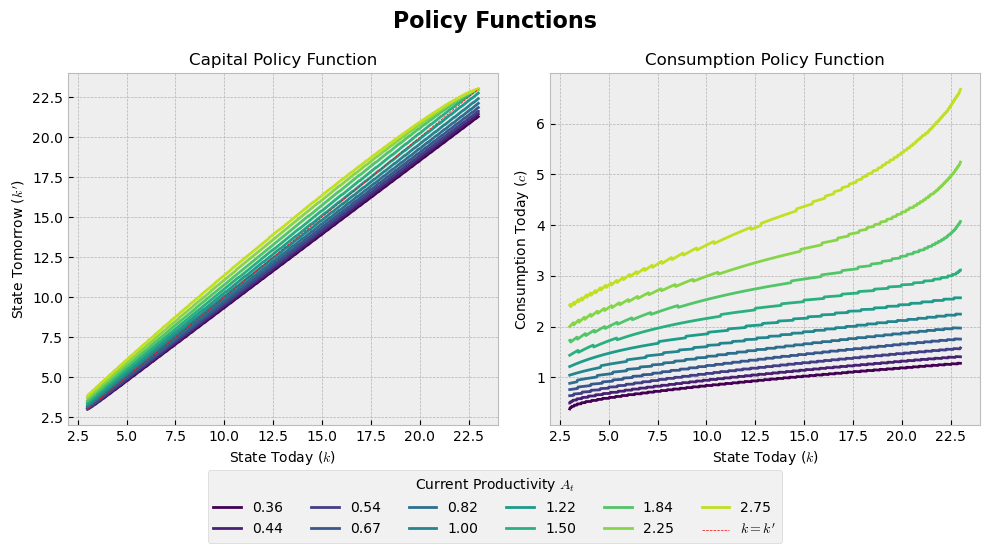

In [163]:
plot_policy_uncertainty(k_space_uncertainty, 
                        policy_k_uncertainty_matrix, 
                        policy_c_uncertainty_matrix, 
                        state_grid_productivity)

### (m) Paths of Other Variables

#### Productivity Shocks

We first simulate productivity shocks with the initial state being 1.

In [164]:
# Simulating a lot of periods
param_dict['T'] = 1000

In [165]:
# Simulating productivity shocks starting at 1
productivity_values = simulate_markov_chain(
    state_grid=state_grid_productivity, 
    transition_matrix=transition_matrix_productivity, 
    T=param_dict['T'],
    initial_value=1
)

# Without uncertainty
# productivity_values = [1 for t in range(param_dict['T'])]

#### Capital

We then calculate the optimal capital path with the policy function, starting from $k_0 = \frac{k_{ss}}{2}$.

In [166]:
# Calculating k_path with the policy function
## k0
optimal_k_path_policy_uncertainty = [k0]

## Other values
for t in range(param_dict['T']):
    # The idea will be to get the closest value to k(t) in k_space and use 
    # this value to calculate the next state k(t+1)
    k_index = np.argmin(np.abs(k_space_uncertainty - optimal_k_path_policy_uncertainty[t]))

    # Next period k'
    ## Grabbing what is the value of the current shock
    current_state_A = productivity_values[t]
    state_A_index = np.where(state_grid_productivity == current_state_A)[0][0]

    ## Next capital
    # Recall that policy_k_uncertainty_matrix is a matrix: each row has a different
    # policy function given the value of the current productivity shock
    optimal_k_path_policy_uncertainty.append(policy_k_uncertainty_matrix[state_A_index, k_index])

# As array
optimal_k_path_policy_uncertainty = np.array(optimal_k_path_policy_uncertainty[:-1])

#### Other Variables

We now calculate the other variables, keeping in mind to account for the random value of $A_t$.

In [167]:
# Output
def output_path_uncertainty(optimal_k_path_uncertainty, productivity_values, param_dict):
    # Getting parameters
    alpha = param_dict['alpha']
    T = param_dict['T']

    # List
    output_values = []

    # Looping
    for t in range(T):
        output_values.append(
            productivity_values[t] * optimal_k_path_uncertainty[t] ** alpha
        )
    
    return np.array(output_values)

In [168]:
# Real interest rate
def r_path_uncertainty(optimal_k_path_uncertainty, productivity_values, param_dict):
    # Getting parameters
    alpha = param_dict['alpha']
    T = param_dict['T']

    # List
    r_values = []

    # Looping
    for t in range(T):
        r_values.append(
            alpha * productivity_values[t] * optimal_k_path_uncertainty[t] ** (alpha - 1)
        )

    return np.array(r_values)

In [169]:
# Calculating paths
y_path_policy_uncertainty = output_path_uncertainty(
    optimal_k_path_policy_uncertainty, productivity_values, param_dict
)

r_path_policy_uncertainty = r_path_uncertainty(
    optimal_k_path_policy_uncertainty, productivity_values, param_dict
)

i_path_policy_uncertainty = investment_path(optimal_k_path_policy_uncertainty, param_dict)

c_path_policy_uncertainty = consumption_path(y_path_policy_uncertainty, i_path_policy_uncertainty)

#### Graphs

In [170]:
def plot_paths_uncertainty(optimal_k_path, k_ss,
                            optimal_y_path, y_ss,
                            optimal_r_path, r_ss,
                            optimal_i_path, i_ss,
                            optimal_c_path, c_ss,
                            productivity_values, A_ss=1):
    
    # Define a color palette
    colors = plt.cm.Paired(np.linspace(0, 1, 6))
    
    # Calculate means and variances
    mean_k, var_k = np.mean(optimal_k_path), np.var(optimal_k_path)
    mean_c, var_c = np.mean(optimal_c_path), np.var(optimal_c_path)
    mean_y, var_y = np.mean(optimal_y_path), np.var(optimal_y_path)
    mean_r, var_r = np.mean(optimal_r_path), np.var(optimal_r_path)
    mean_i, var_i = np.mean(optimal_i_path), np.var(optimal_i_path)
    mean_iy = np.mean(np.array(optimal_i_path) / np.array(optimal_y_path))
    var_iy = np.var(np.array(optimal_i_path) / np.array(optimal_y_path))
    mean_A, var_A = np.mean(productivity_values), np.var(productivity_values)
    
    # Object and title
    fig = plt.figure(figsize=(12, 6))
    fig.suptitle('Path of Endogenous Variables in the RBC Model with TFP Uncertainty', 
                fontsize=16, fontweight='bold')

    # Plot the 'k' variable
    ax_k = plt.subplot2grid((2, 4), (0, 0))
    ax_k.plot(optimal_k_path, color=colors[0])
    ax_k.axhline(y=k_ss, color='black', linestyle='--', linewidth=1)
    ax_k.set_xlabel('Time', fontsize=10)
    ax_k.set_ylabel(r'Capital ($k_t$)', fontsize=10)
    ax_k.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_k.text(0.05, 0.95, f'Mean: {mean_k:.2f}\nSS: {k_ss:.2f}\nVariance: {var_k:.2f}', 
              transform=ax_k.transAxes, fontsize=9, 
              verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    # Plot the 'c' variable
    ax_c = plt.subplot2grid((2, 4), (0, 1))
    ax_c.plot(optimal_c_path, color=colors[1])
    ax_c.axhline(y=c_ss, color='black', linestyle='--', linewidth=1)
    ax_c.set_xlabel('Time', fontsize=10)
    ax_c.set_ylabel(r'Consumption ($c_t$)', fontsize=10)
    ax_c.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_c.text(0.05, 0.95, f'Mean: {mean_c:.2f}\nSS: {c_ss:.2f}\nVariance: {var_c:.2f}', 
              transform=ax_c.transAxes, fontsize=9, 
              verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    # Plot the 'y' variable
    ax_y = plt.subplot2grid((2, 4), (1, 0))
    ax_y.plot(optimal_y_path, color=colors[2])
    ax_y.axhline(y=y_ss, color='black', linestyle='--', linewidth=1)
    ax_y.set_xlabel('Time', fontsize=10)
    ax_y.set_ylabel(r'Output ($Y_t$)', fontsize=10)
    ax_y.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_y.text(0.05, 0.95, f'Mean: {mean_y:.2f}\nSS: {y_ss:.2f}\nVariance: {var_y:.2f}', 
              transform=ax_y.transAxes, fontsize=9, 
              verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    # Plot the 'r' variable
    ax_r = plt.subplot2grid((2, 4), (1, 1))
    ax_r.plot(optimal_r_path, color=colors[3])
    ax_r.axhline(y=r_ss, color='black', linestyle='--', linewidth=1)
    ax_r.set_xlabel('Time', fontsize=10)
    ax_r.set_ylabel(r'Real Interest Rate ($r_t$)', fontsize=10)
    ax_r.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_r.text(0.05, 0.95, f'Mean: {mean_r:.2f}\nSS: {r_ss:.2f}\nVariance: {var_r:.3f}', 
              transform=ax_r.transAxes, fontsize=9, 
              verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    # Plot the 'i' variable
    ax_i = plt.subplot2grid((2, 4), (0, 2))
    ax_i.plot(optimal_i_path, color=colors[4])
    ax_i.axhline(y=i_ss, color='black', linestyle='--', linewidth=1)
    ax_i.set_xlabel('Time', fontsize=10)
    ax_i.set_ylabel(r'Gross Investment ($i_t$)', fontsize=10)
    ax_i.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_i.text(0.05, 0.95, f'Mean: {mean_i:.2f}\nSS: {i_ss:.2f}\nVariance: {var_i:.3f}', 
              transform=ax_i.transAxes, fontsize=9, 
              verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    # Plot the investment-to-output ratio
    ax_iy = plt.subplot2grid((2, 4), (1, 2), colspan=1)
    ax_iy.plot(np.array(optimal_i_path) / np.array(optimal_y_path), color=colors[5])
    ax_iy.axhline(y=i_ss / y_ss, color='black', linestyle='--', linewidth=1)
    ax_iy.set_xlabel('Time', fontsize=10)
    ax_iy.set_ylabel(r'Investment to Output Ratio ($i_t / Y_t$)', fontsize=10)
    ax_iy.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_iy.text(0.05, 0.95, f'Mean: {mean_iy:.2f}\nSS: {i_ss / y_ss:.2f}\nVariance: {var_iy:.3f}', 
               transform=ax_iy.transAxes, fontsize=9, 
               verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    # Plot the 'A' variable
    ax_A = plt.subplot2grid((2, 4), (0, 3), rowspan=2)
    ax_A.plot(productivity_values, color='black')
    ax_A.axhline(y=A_ss, color='black', linestyle='--', linewidth=1)
    ax_A.set_xlabel('Time', fontsize=10)
    ax_A.set_ylabel(r'Total Factor Productivity (TFP) ($A_t$)', fontsize=10)
    ax_A.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_A.text(0.05, 0.95, f'Mean: {mean_A:.2f}\nVariance: {var_A:.2f}', 
              transform=ax_A.transAxes, fontsize=9, 
              verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    plt.tight_layout()
    plt.show()

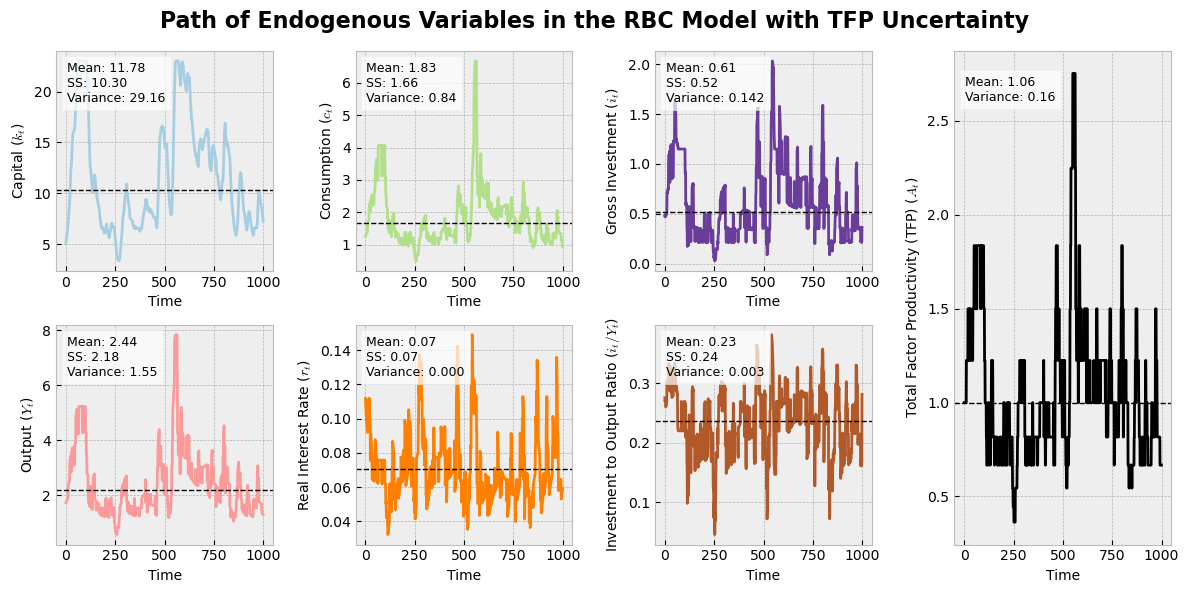

In [171]:
plot_paths_uncertainty(
    optimal_k_path=optimal_k_path_policy_uncertainty, k_ss=k_ss,
    optimal_y_path=y_path_policy_uncertainty, y_ss=y_ss,
    optimal_r_path=r_path_policy_uncertainty, r_ss=r_ss,
    optimal_i_path=i_path_policy_uncertainty, i_ss=i_ss,
    optimal_c_path=c_path_policy_uncertainty, c_ss=c_ss,
    productivity_values=productivity_values, A_ss=1
)

### (n) 1000 Paths of Capital and Consumption

We will simulate 1000 times the path of capital and consumption, always starting at $k_0 = \frac{k_{SS}}{2}$.

With this data at hand, we will construct the average path and build a 90% confidence interval.
To accomplish the confidence interval, we will consider the 5th to 95th quantile of our sample realizations.

In [172]:
# Number of simulations
n_simulations = 1000

# Arrays
capital_paths_simulations = np.zeros([n_simulations, param_dict['T']])
consumption_paths_simulations = np.zeros([n_simulations, param_dict['T']])
output_paths_simulations = np.zeros([n_simulations, param_dict['T']])
investment_paths_simulations = np.zeros([n_simulations, param_dict['T']])

In [173]:
# Doing the 1000 simulations: this takes a while (one minute)
for n_simulation in range(n_simulations):
    # Simulating productivity shocks
    productivity_values_sim = simulate_markov_chain(
        state_grid=state_grid_productivity, 
        transition_matrix=transition_matrix_productivity, 
        T=param_dict['T']
    )

    # Calculating k_path with the policy function
    ## k0
    optimal_k_path_policy_uncertainty_sim = [k0]

    ## Other values
    for t in range(param_dict['T']):
        # The idea will be to get the closest value to k(t) in k_space and use 
        # this value to calculate the next state k(t+1)
        k_index = np.argmin(np.abs(k_space_uncertainty - optimal_k_path_policy_uncertainty_sim[t]))

        # Next period k'
        ## Grabbing what is the value of the current shock
        current_state_A = productivity_values_sim[t]
        state_A_index = np.where(state_grid_productivity == current_state_A)[0][0]

        ## Next capital
        optimal_k_path_policy_uncertainty_sim.append(policy_k_uncertainty_matrix[state_A_index, k_index])

    ## As array
    optimal_k_path_policy_uncertainty_sim = np.array(optimal_k_path_policy_uncertainty_sim[:-1])

    # Output
    y_path_policy_uncertainty_sim = output_path_uncertainty(
        optimal_k_path_policy_uncertainty_sim, productivity_values_sim, param_dict
    )

    # Investment
    i_path_policy_uncertainty_sim = investment_path(optimal_k_path_policy_uncertainty_sim, param_dict)

    # Consumption
    c_path_policy_uncertainty_sim = consumption_path(y_path_policy_uncertainty_sim, i_path_policy_uncertainty_sim)

    # Appending to arrays
    capital_paths_simulations[n_simulation] = optimal_k_path_policy_uncertainty_sim
    consumption_paths_simulations[n_simulation] = c_path_policy_uncertainty_sim
    output_paths_simulations[n_simulation] = y_path_policy_uncertainty_sim
    investment_paths_simulations[n_simulation] = i_path_policy_uncertainty_sim

In [174]:
# Calculate mean and 90% confidence intervals for capital paths
mean_capital = np.mean(capital_paths_simulations, axis=0)
sorted_capital = np.sort(capital_paths_simulations, axis=0)
conf_interval_capital_low = sorted_capital[int(0.05 * n_simulations), :]
conf_interval_capital_high = sorted_capital[int(0.95 * n_simulations), :]

# Calculate mean and 90% confidence intervals for consumption paths
mean_consumption = np.mean(consumption_paths_simulations, axis=0)
sorted_consumption = np.sort(consumption_paths_simulations, axis=0)
conf_interval_consumption_low = sorted_consumption[int(0.05 * n_simulations), :]
conf_interval_consumption_high = sorted_consumption[int(0.95 * n_simulations), :]

# Calculate mean and 90% confidence intervals for output paths
mean_output = np.mean(output_paths_simulations, axis=0)
sorted_output = np.sort(output_paths_simulations, axis=0)
conf_interval_output_low = sorted_output[int(0.05 * n_simulations), :]
conf_interval_output_high = sorted_output[int(0.95 * n_simulations), :]

# Calculate mean and 90% confidence intervals for investment paths
mean_investment = np.mean(investment_paths_simulations, axis=0)
sorted_investment = np.sort(investment_paths_simulations, axis=0)
conf_interval_investment_low = sorted_investment[int(0.05 * n_simulations), :]
conf_interval_investment_high = sorted_investment[int(0.95 * n_simulations), :]

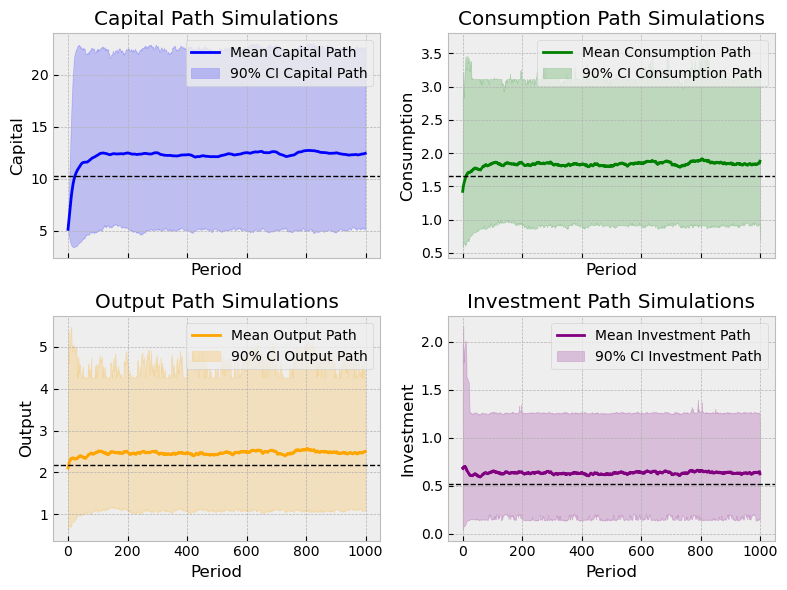

In [175]:
# Create a 2x1 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True)

# Periods
periods = range(param_dict['T'])

# Plot for capital paths
periods = np.arange(capital_paths_simulations.shape[1])
ax[0, 0].plot(periods, mean_capital, color='blue', label='Mean Capital Path')
ax[0, 0].axhline(y=k_ss, color='black', linestyle='--', linewidth=1)
ax[0, 0].fill_between(periods, conf_interval_capital_low, conf_interval_capital_high, 
                      color='blue', alpha=0.2, label='90% CI Capital Path')
ax[0, 0].set_xlabel('Period')
ax[0, 0].set_ylabel('Capital')
ax[0, 0].set_title('Capital Path Simulations')
ax[0, 0].legend()

# Plot for consumption paths
ax[0, 1].plot(periods, mean_consumption, color='green', label='Mean Consumption Path')
ax[0, 1].axhline(y=c_ss, color='black', linestyle='--', linewidth=1)
ax[0, 1].fill_between(periods, conf_interval_consumption_low, conf_interval_consumption_high, 
                      color='green', alpha=0.2, label='90% CI Consumption Path')
ax[0, 1].set_xlabel('Period')
ax[0, 1].set_ylabel('Consumption')
ax[0, 1].set_title('Consumption Path Simulations')
ax[0, 1].legend()

# Plot for output paths
ax[1, 0].plot(periods, mean_output, color='orange', label='Mean Output Path')
ax[1, 0].axhline(y=y_ss, color='black', linestyle='--', linewidth=1)
ax[1, 0].fill_between(periods, conf_interval_output_low, conf_interval_output_high, 
                      color='orange', alpha=0.2, label='90% CI Output Path')
ax[1, 0].set_xlabel('Period')
ax[1, 0].set_ylabel('Output')
ax[1, 0].set_title('Output Path Simulations')
ax[1, 0].legend()

# Plot for investment paths
ax[1, 1].plot(periods, mean_investment, color='purple', label='Mean Investment Path')
ax[1, 1].axhline(y=i_ss, color='black', linestyle='--', linewidth=1)
ax[1, 1].fill_between(periods, conf_interval_investment_low, conf_interval_investment_high, 
                      color='purple', alpha=0.2, label='90% CI Investment Path')
ax[1, 1].set_xlabel('Period')
ax[1, 1].set_ylabel('Investment')
ax[1, 1].set_title('Investment Path Simulations')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

Due to uncertainty in the model and agents being risk-averse, they now consume less and invest more relative to the steady-state, in fear of downward productivity shocks that could further reduce output and consumption in the next period.

This leads to higher capital accumulation, to an average point that is bigger than the steady-state value.

We see that the average capital path (10.6) is higher than the value of the steady state (10.3).
As said above, this is because the risk-averse agents now invest more to increase capital accumulation and output, which serves to smooth consumption in case of downwards productivity shocks.

This is seen in the simulations, where investment, consumption and output are bigger than their steady-state values.
This is possible because shocks on average cancel out, which leads to increased output on average.

A fun thing is that, if we simulate with a grid of $A_t$ which has a lower range (e.g., using a standard deviation of 0.01 instead of a variance of 0.01), the values are closer to the steady-state: given the possibility of bigger shocks, agent take more precaution. Nice!

In [176]:
# Final script time
t_final_script = time.time()
print(f"Script total run time: {round(t_final_script - t0_script, 0)} seconds.") # ~200

Script total run time: 193.0 seconds.
